# Some Useful Algorithms

## DFT (Discrete Fourier Transformation) Algorithm

Let $(\{x_n\})$ be a sequence defined as

$(x_0, x_1, \ldots, x_{N-1})$.

This sequence can be transformed into another sequence of complex numbers, $(\{X_k\})$, defined as

$(X_0, X_1, \ldots, X_{N-1})$,

using the Discrete Fourier Transform (DFT) which is given by:

$[
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i2\pi \frac{kn}{N}} \quad \text{(Eq.1)}
]$

The transform is sometimes denoted by the symbol $(\mathcal{F})$, as in $(X = \mathcal{F}\{{x}\})$ or $(F(x))$ or $(F_x)$.

The inverse transform is given by:

$[
x_k = (1/N)\sum_{n=0}^{N-1} X_n \cdot e^{i2\pi \frac{kn}{N}} \quad \text{(Eq.1)}
]$

x=  [ 1.+0.j  2.-1.j -0.-1.j -1.+2.j]
FT_X =  [ 2.+0.j -2.-2.j  0.-2.j  4.+4.j]
IDFT_X=  [ 1.+0.j  2.-1.j  0.-1.j -1.+2.j]


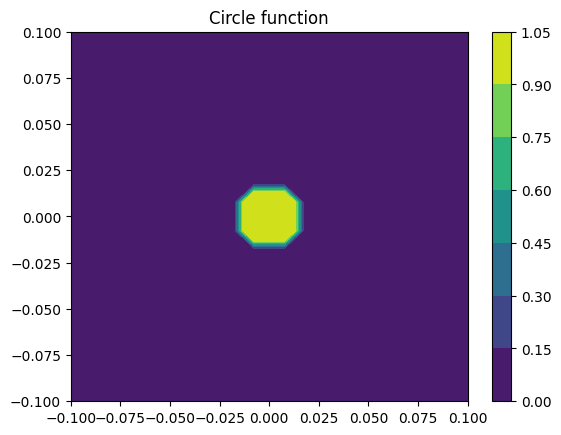

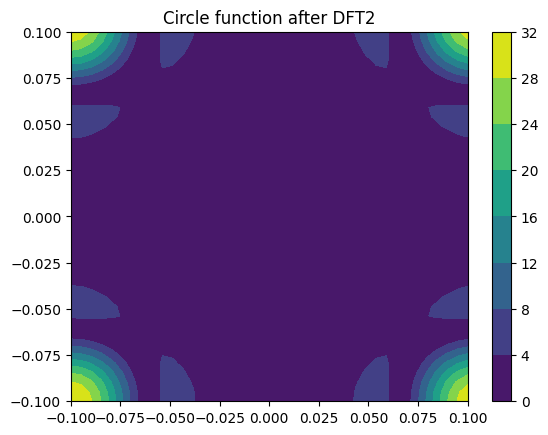

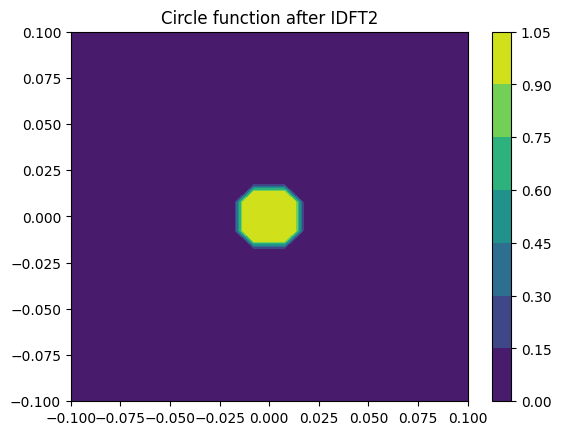

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# DFT algorithm

x = np.array([1, 2 - 1j , -1j , -1 + 2j])

def dft(x):
    x = np.asarray(x)
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

print("x= ",x)
FT_X = dft(x=x)
print("FT_X = ",np.round(FT_X))

# IDFT algorithm

def idft(x):
    N = len(x)
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    return np.dot(M, x)/N

IDFT_X = idft(x=FT_X)
print("IDFT_X= ",np.round(IDFT_X))

# 2D DFT (namely DFT2)
def dft2(X):
    N,M = np.shape(X)
    Y = np.zeros(np.shape(X), dtype=complex)

    for p in range(0,N):
      for q in range(0,M):
        sum = 0 + 0j
        for k in range(0,M):
          for l in range(0,N):
            tobesummed = X[k][l] * np.exp(-1j*2*np.pi*k*p/M) * np.exp(-1j*2*np.pi*l*q/N)
            sum += tobesummed
        Y[p][q] = sum

    return Y

# 2D IDFT (namely DFT2)
def idft2(X):
  N,M = np.shape(X)
  Y = np.zeros(np.shape(X), dtype=complex)
  for p in range(0,N):
    for q in range(0,M):
      sum = 0 + 0j
      for k in range(0,M):
        for l in range(0,N):
          tobesummed = X[k][l] * np.exp(1j*2*np.pi*k*p/M) * np.exp(1j*2*np.pi*l*q/N) / (M*N)
          sum += tobesummed
      Y[p][q] = sum

  return Y
# Example For DFT2:

def circ(r):
    return lambda x, y: np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

r = 0.015
L = 0.2
M = 40

# Visualization of the 1D functions
x = np.linspace(-L/2, L/2, M)
y = x
X, Y = np.meshgrid(x, y)
r = 0.015
circ_plot = circ(r)(X, Y)

plt.contourf(X, Y, circ_plot)
plt.title("Circle function")
plt.colorbar()
plt.show()

alpha = 1
FT2 = dft2(circ_plot)
plt.contourf(X, Y, np.abs((dft2(circ_plot)))**alpha)
plt.title("Circle function after DFT2")
plt.colorbar()
plt.show()


IFT2 = idft2(FT2)
plt.contourf(X, Y, np.abs(IFT2)**alpha)
plt.title("Circle function after IDFT2")
plt.colorbar()
plt.show()


## FFT (Fast Fourier Transformation) Algorithm
Radix-2 Cooley-Tukey

from: https://jbrd.github.io/2017/11/21/implementing-the-radix-2-cooley-tukey-fft.html

In [3]:

'''x = np.array([1, 2 - 1j , -1j , -1 + 2j])
# bit reverse order

import numpy as np

def bit_reversal(values_real, values_imag, n):
    values_real.setflags(write=True)
    values_imag.setflags(write=True)
    # Implement bit reversal for array elements
    j = 0
    for i in range(1, n):
        bit = n >> 1
        while j >= bit:
            j -= bit
            bit >>= 1
        j += bit
        if i < j:
            values_real[i], values_real[j] = values_real[j], values_real[i]
            values_imag[i], values_imag[j] = values_imag[j], values_imag[i]

def fft(values_real, values_imag, maxN):
    n = len(values_real)
    bit_reversal(values_real, values_imag, n)

    previousN = 1
    while previousN < maxN:
        wRE = 1.0
        wIM = 0.0

        # Compute alpha and beta for trigonometric recurrences
        alpha = np.sin(-np.pi / (previousN << 1))
        alpha *= alpha * 2.0
        beta = np.sin(-np.pi / previousN)

        for pairOffset in range(previousN):
            for groupOffset in range(0, maxN, previousN << 1):
                i = groupOffset + pairOffset
                j = i + previousN

                # Compute even and odd terms
                evenRE = values_real[i]
                evenIM = values_imag[i]
                oddRE = (wRE * values_real[j]) - (wIM * values_imag[j])
                oddIM = (wRE * values_imag[j]) + (wIM * values_real[j])

                # Compute new values
                values_real[i] = evenRE + oddRE
                values_imag[i] = evenIM + oddIM
                values_real[j] = evenRE - oddRE
                values_imag[j] = evenIM - oddIM

            # Update wRE and wIM using trigonometric recurrence
            wRENext = wRE - (alpha * wRE) - (beta * wIM)
            wIMNext = wIM + (beta * wRE) - (alpha * wIM)
            wRE = wRENext
            wIM = wIMNext

        previousN <<= 1

# Example usage
values_real = x.real
values_imag = x.imag
fft(values_real, values_imag, maxN=4)
FT = list(map(complex, np.round(values_real), np.round(values_imag)))
print(FT)
'''

'x = np.array([1, 2 - 1j , -1j , -1 + 2j])\n# bit reverse order\n\nimport numpy as np\n\ndef bit_reversal(values_real, values_imag, n):\n    values_real.setflags(write=True)\n    values_imag.setflags(write=True)\n    # Implement bit reversal for array elements\n    j = 0\n    for i in range(1, n):\n        bit = n >> 1\n        while j >= bit:\n            j -= bit\n            bit >>= 1\n        j += bit\n        if i < j:\n            values_real[i], values_real[j] = values_real[j], values_real[i]\n            values_imag[i], values_imag[j] = values_imag[j], values_imag[i]\n\ndef fft(values_real, values_imag, maxN):\n    n = len(values_real)\n    bit_reversal(values_real, values_imag, n)\n\n    previousN = 1\n    while previousN < maxN:\n        wRE = 1.0\n        wIM = 0.0\n\n        # Compute alpha and beta for trigonometric recurrences\n        alpha = np.sin(-np.pi / (previousN << 1))\n        alpha *= alpha * 2.0\n        beta = np.sin(-np.pi / previousN)\n\n        for pairOffs

# CHAPTER 1

Analytic Fourier Theory Review


* The analytic Fourier transform of a function g of two variables x and y is given by

$$
G(f_x, f_y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(x, y) \exp\left(-j 2 \pi (f_x x + f_y y)\right) dx dy
$$
* short version of Fourier transform:
$$
\mathscr{F}\{g(x, y)\} = G(f_x, f_y)
$$
-------------------------------------------------------------------------------
* The analytic inverse Fourier transform is given by

$$
g(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} G(f_x, f_y) \exp\left(j 2 \pi (f_x x + f_y y)\right) dx dy
$$

* short version of Inverse Fourier transform:
$$
\mathscr{F}\{g(x, y)\} = G(f_x, f_y)
$$
-------------------------------------------------------------------------------
Conditions:
* (a) g must be absolutely integrable over the infinite range of x and y;
* (b) g must have only a finite number of discontinuities; and
* (c) g must have no infinite discontinuities.
-------------------------------------------------------------------------------




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, fft, ifft, ifftshift


Some useful functions

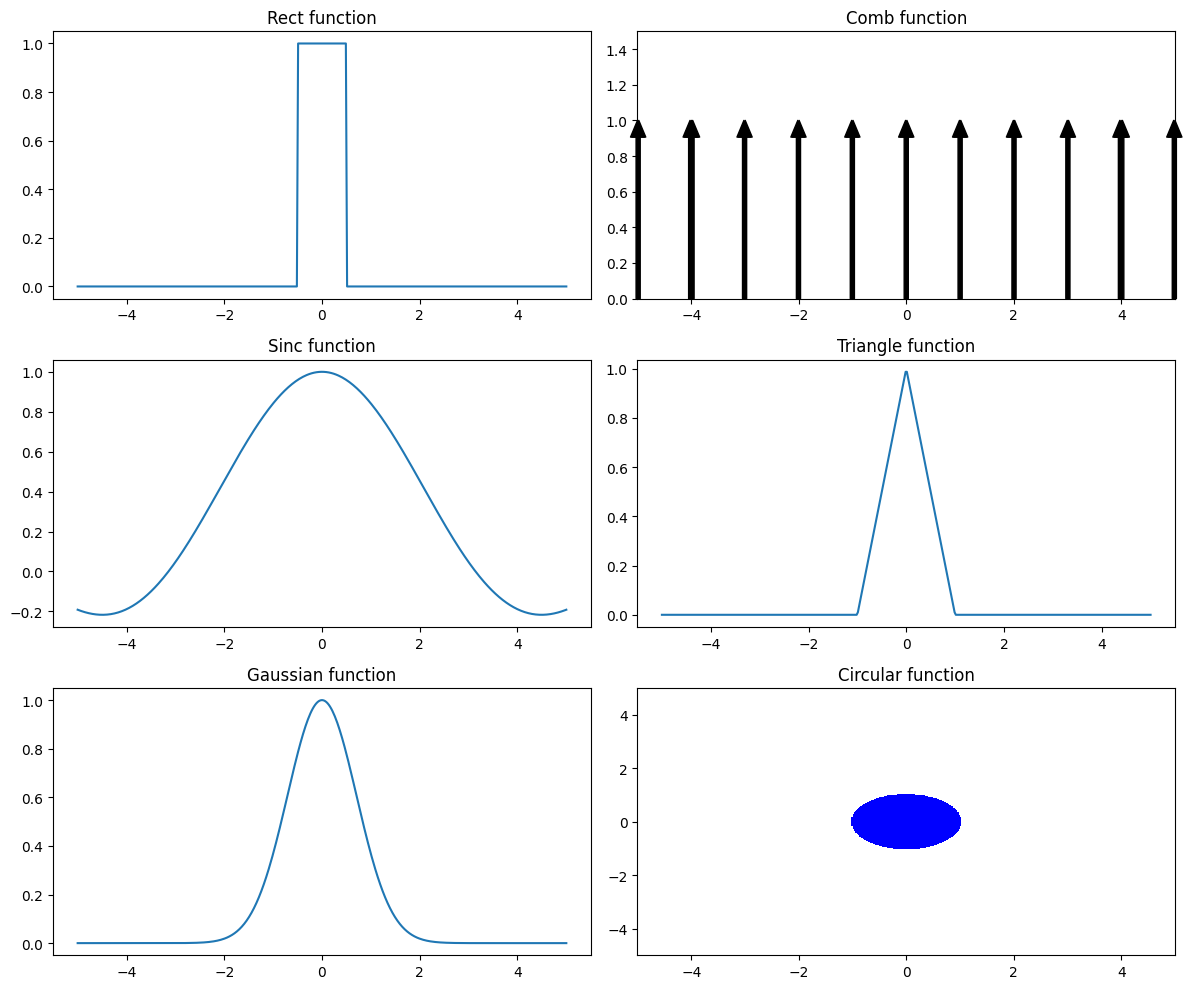

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rect function
def rect(x):
    return np.where(np.abs(x) <= 0.5, 1, 0)

def comb(x):
    # Dirac delta approximation: 1 where x is an integer, 0 otherwise
    return np.where(np.abs(x - np.round(x)) < 3e-2, 1, 0)

def circ_(x, y, r):
    return np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

def sinc(x):
    return np.where(x == 0, 1, np.sin(x) / x)

def triangle(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

def gauss(x):
    return np.exp(-x**2)

def circ(r):
    return lambda x, y: np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

# Visualization of the 1D functions
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# 1D function plots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Rect function
axs[0, 0].plot(x, rect(x))
axs[0, 0].set_title("Rect function")

# Comb function with arrows at integer values
comb_vals = comb(x)
for i in range(len(x)):
    if comb_vals[i] == 1:  # Only plot arrows for integer positions
        axs[0, 1].annotate("", xy=(x[i], 1), xytext=(x[i], 0),
                          arrowprops=dict(facecolor='black', headwidth=10, width=2))
axs[0, 1].set_xlim([-5, 5])
axs[0, 1].set_ylim([0, 1.5])
axs[0, 1].set_title("Comb function")

# Sinc function
axs[1, 0].plot(x, sinc(x))
axs[1, 0].set_title("Sinc function")

# Triangle function
axs[1, 1].plot(x, triangle(x))
axs[1, 1].set_title("Triangle function")

# Gaussian function
axs[2, 0].plot(x, gauss(x))
axs[2, 0].set_title("Gaussian function")

# 2D plot for the circular function
circ_plot = circ(1)
Z = circ_plot(X, Y)
plt.subplot(3, 2, 6)
plt.contourf(X, Y, Z, levels=[-0.1, 0, 1], colors=["white", "blue"])
plt.title("Circular function")

plt.tight_layout()
plt.show()


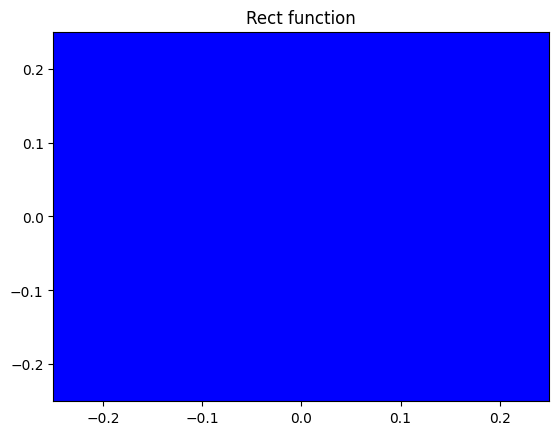

In [6]:
L = 0.5
M = 250
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w = 1
function_to_be_F_transformed1 = rect(X/2*w)* rect(Y/2*w)
plt.contourf(X, Y, function_to_be_F_transformed1, levels=[-1, 0, 1], colors=["white", "blue"])
plt.title("Rect function")
plt.show()

{0.0, 62500.0}


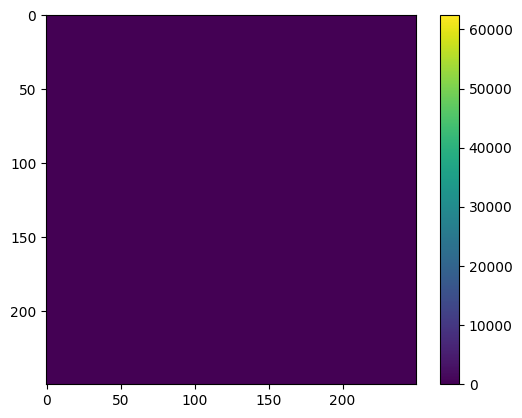

In [7]:
FT_ = fft2(fftshift(function_to_be_F_transformed1))
print(set(list(np.real(FT_).flatten().round())))
plt.imshow(np.real(FT_))
plt.colorbar()
plt.show()

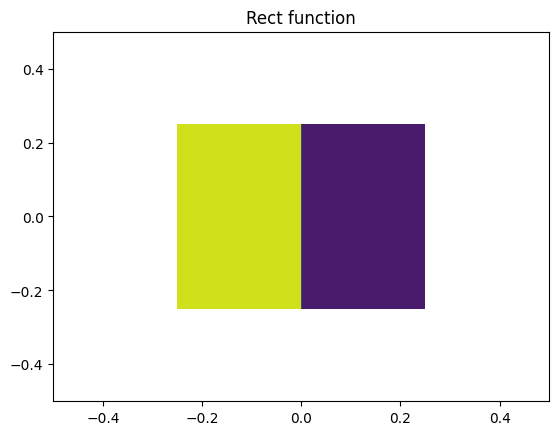

[[31250.   250.     0. ...   250.     0.   250.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]


In [8]:
L = 0.5
M = 250
x = np.linspace(-L / 2, L / 2, M)
x0 = -1

y = x
X, Y = np.meshgrid(x, y)
w = 1
function_to_be_F_transformed2 = rect((X- x0)/2*w)* rect(Y/2*w)
plt.contourf(X, Y, function_to_be_F_transformed2)
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.title("Rect function")
plt.show()
FT_2 = fft2(function_to_be_F_transformed2)
print(np.real(FT_2).round())



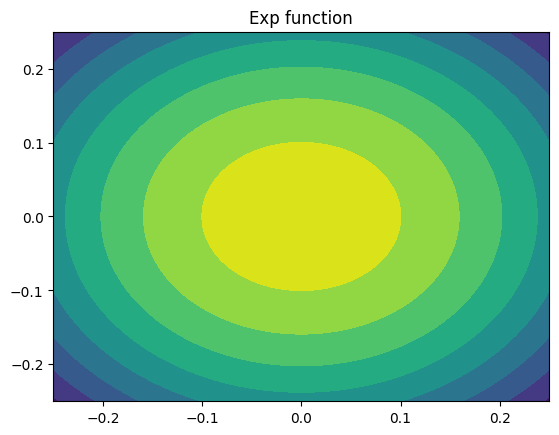

[[24.69310864 12.99409329 10.07054947 ...  8.19341021 10.07054947
  12.99409329]
 [12.99409329  6.08687504  4.78173986 ...  4.0929668   4.93771544
   6.4215981 ]
 [10.07054947  4.78173986  3.42454063 ...  2.66896841  3.49732657
   4.93771544]
 ...
 [ 8.19341021  4.0929668   2.66896841 ...  1.82153638  2.62620587
   4.00135321]
 [10.07054947  4.93771544  3.49732657 ...  2.62620587  3.42454063
   4.78173986]
 [12.99409329  6.4215981   4.93771544 ...  4.00135321  4.78173986
   6.08687504]]


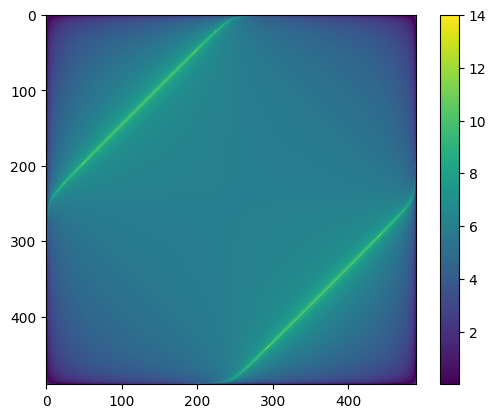

In [9]:
L = 0.5
M = 1000
x = np.linspace(-L / 2, L / 2, M)
x0 = 0

y = x
X, Y = np.meshgrid(x, y)
w = 1
function_to_be_F_transformed3 = np.exp(-(X**2 + Y**2)/(w**2))

plt.contourf(X, Y, function_to_be_F_transformed3)
plt.title("Exp function")
plt.show()
FT_3 = fft2(function_to_be_F_transformed3[int(M/2 + 10):, int(M/2 + 10):])
print(np.abs(np.log(np.real(FT_3)**2)))
plt.imshow(np.abs(np.log10(np.real(FT_3)**2)))
plt.colorbar()
plt.show()

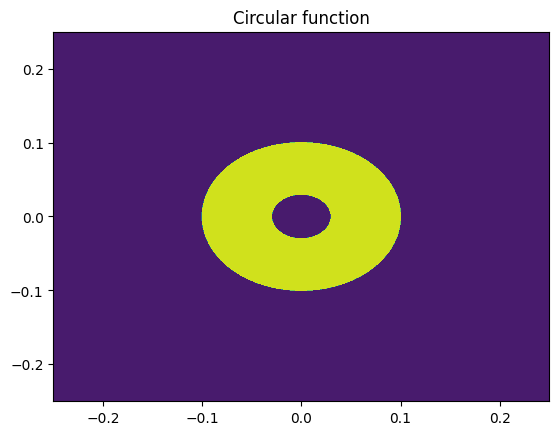

[[8.82084581 8.03571667 7.31538813 ... 5.58030271 7.31538813 8.03571667]
 [8.03571667 8.08361174 8.21229529 ... 6.61777754 6.90955162 8.28184668]
 [7.31538813 8.21229529 6.98545229 ... 5.87513207 5.79016494 6.90955162]
 ...
 [5.58030271 6.61777754 5.87513207 ... 4.4480862  6.83756276 6.60504416]
 [7.31538813 6.90955162 5.79016494 ... 6.83756276 6.98545229 8.21229529]
 [8.03571667 8.28184668 6.90955162 ... 6.60504416 8.21229529 8.08361174]]


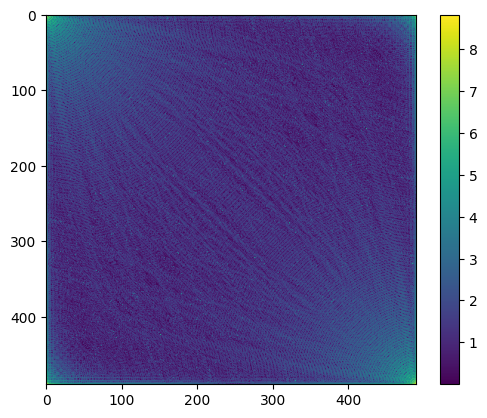

In [10]:
L = 0.5
M = 1000
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w1 = 0.1
w2 = 0.03

circ_plot = circ(w1)
circ_plot2 = circ(w2)
function_to_be_F_transformed5 = circ_plot(X, Y) - circ_plot2(X, Y)

# 2D plot for the circular function
plt.contourf(X, Y, function_to_be_F_transformed5)
plt.title("Circular function")
plt.title("Circular function")
plt.show()


FT_5 = fft2(function_to_be_F_transformed5[int(M/2 + 10):, int(M/2 + 10):])

print(np.abs(np.log10(np.real(FT_5)**2)))
plt.imshow(np.abs(np.log10(np.real(FT_5)**2)))
plt.colorbar()
plt.show()

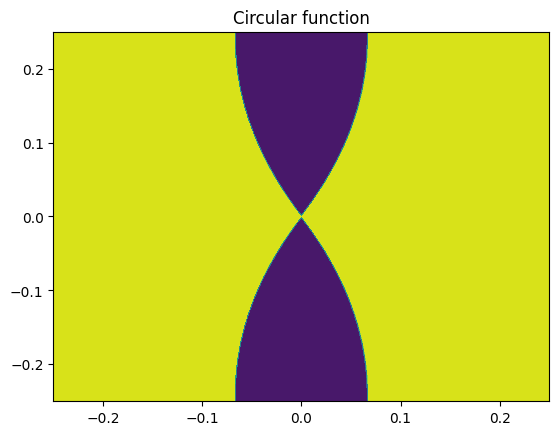

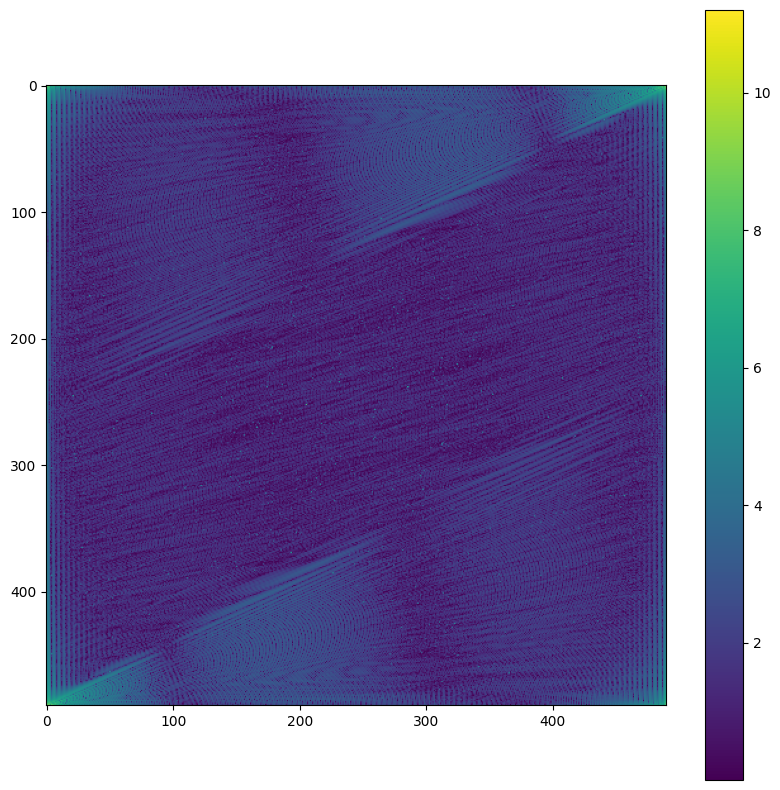

In [11]:
L = 0.5
M = 1000
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w1 = 0.5
d = 0.001



circ_plot = circ((np.sqrt((X-d/2)**2) + Y**2)/w1)
circ_plot2 = circ((np.sqrt((X + d/2)**2) + Y**2)/w1)
function_to_be_F_transformed6 = circ_plot(X, Y) + circ_plot2(X, Y)

# 2D plot for the circular function
plt.contourf(X, Y, function_to_be_F_transformed6)
plt.title("Circular function")
plt.title("Circular function")
plt.show()


FT_6 = fft2(function_to_be_F_transformed6[int(M/2 + 10):, int(M/2 + 10):])
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(np.log10(np.real(FT_6)**2)))
plt.colorbar()
plt.show()

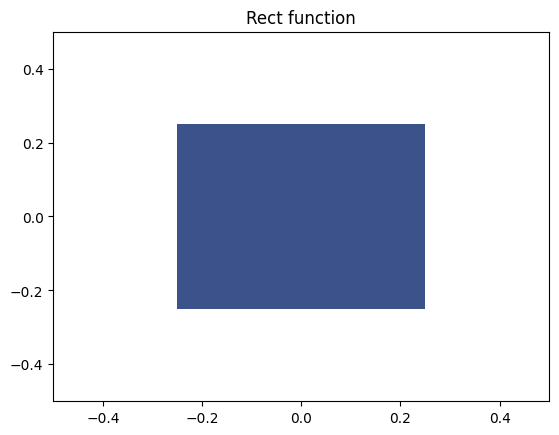

In [12]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w = 0.5


Funct_to_be_convolved_1 = rect(X/2*w)* rect(Y/2*w)
plt.contourf(X, Y, Funct_to_be_convolved_1)
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.title("Rect function")
plt.show()

#Funct_to_be_convolved_2 = rect(X/2*w)* rect(Y/2*w)

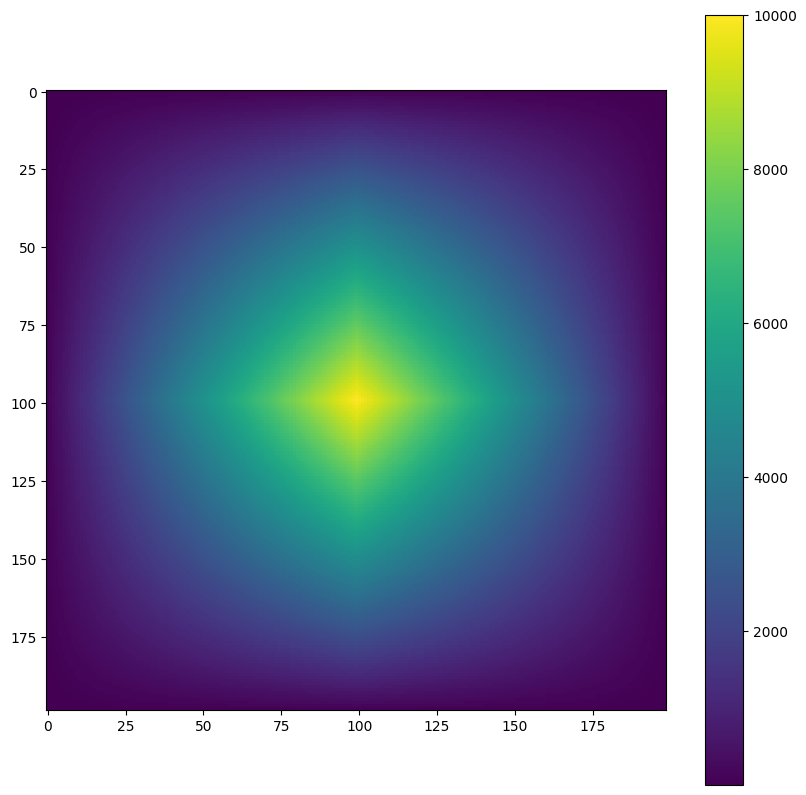

In [13]:
import scipy.signal as signal

convolved1 = signal.convolve2d(Funct_to_be_convolved_1,Funct_to_be_convolved_1)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved1)
plt.colorbar()
plt.show()



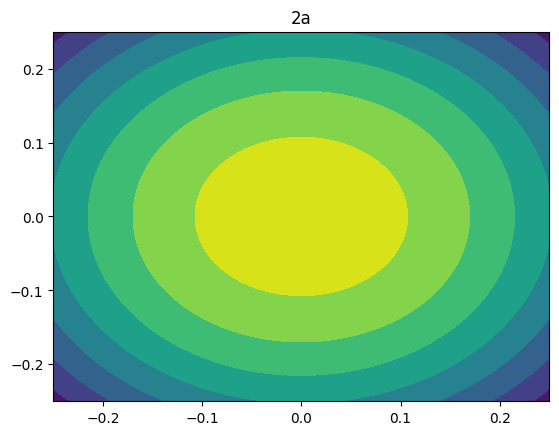

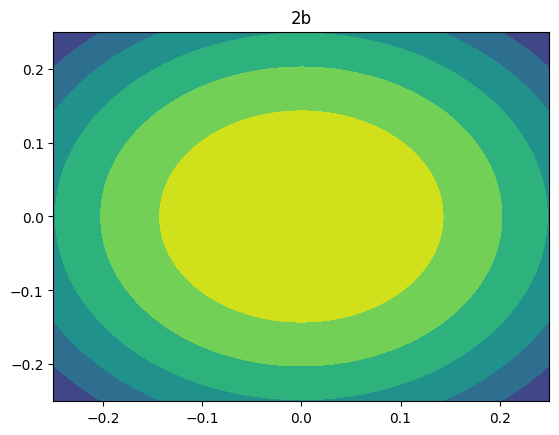

In [14]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w1 = 3
w2 = 4

Funct_to_be_convolved_2a = np.exp(-np.pi*(X**2 + Y**2)/w1**2)
Funct_to_be_convolved_2b = np.exp(-np.pi*(X**2 + Y**2)/w2**2)

#rect(X/2*w)* rect(Y/2*w)
plt.contourf(X, Y, Funct_to_be_convolved_2a)
plt.title("2a")
plt.show()

plt.contourf(X, Y, Funct_to_be_convolved_2b)
plt.title("2b")
plt.show()


#Funct_to_be_convolved_2 = rect(X/2*w)* rect(Y/2*w)

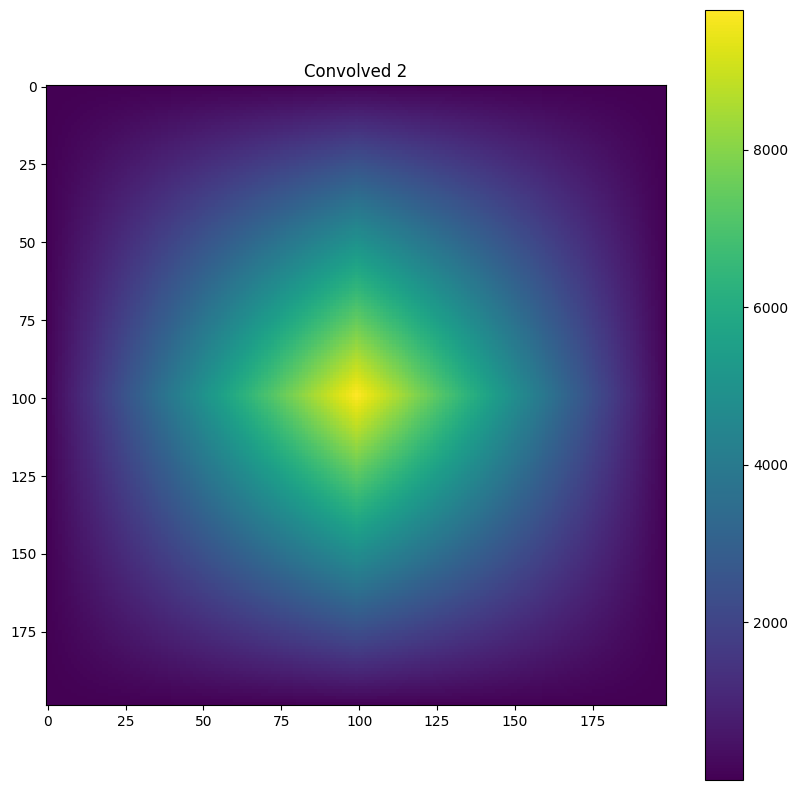

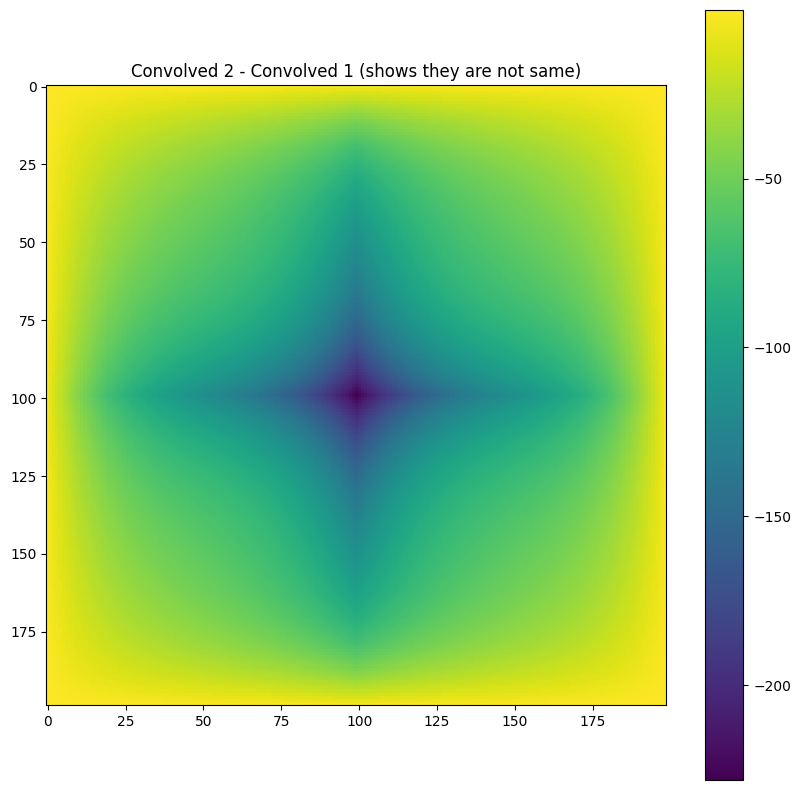

In [15]:
import scipy.signal as signal

convolved2 = signal.convolve2d(Funct_to_be_convolved_2a,Funct_to_be_convolved_2b)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved2)
plt.colorbar()
plt.title('Convolved 2')
plt.show()

# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved2 - convolved1)
plt.colorbar()
plt.title('Convolved 2 - Convolved 1 (shows they are not same)')
plt.show()

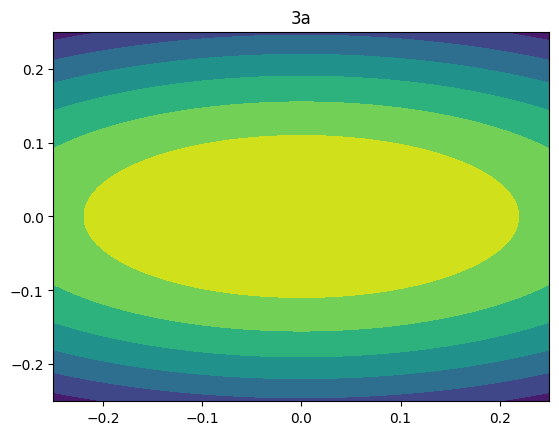

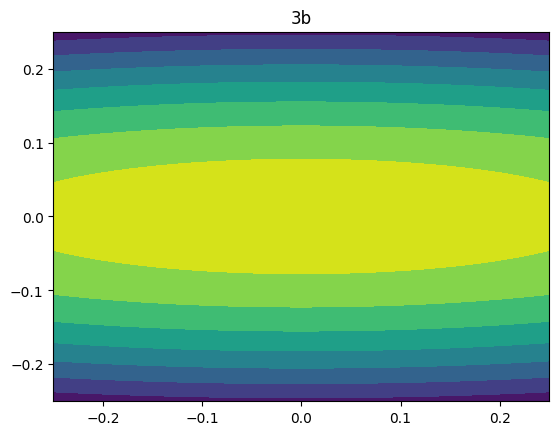

In [16]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w1 = 3
w2 = 4

Funct_to_be_convolved_3a = sinc(X/2)* sinc(Y)
Funct_to_be_convolved_3b = sinc(X/4)* sinc(Y)

#rect(X/2*w)* rect(Y/2*w)
plt.contourf(X, Y, Funct_to_be_convolved_3a)
plt.title("3a")
plt.show()

plt.contourf(X, Y, Funct_to_be_convolved_3b)
plt.title("3b")
plt.show()


#Funct_to_be_convolved_2 = rect(X/2*w)* rect(Y/2*w)

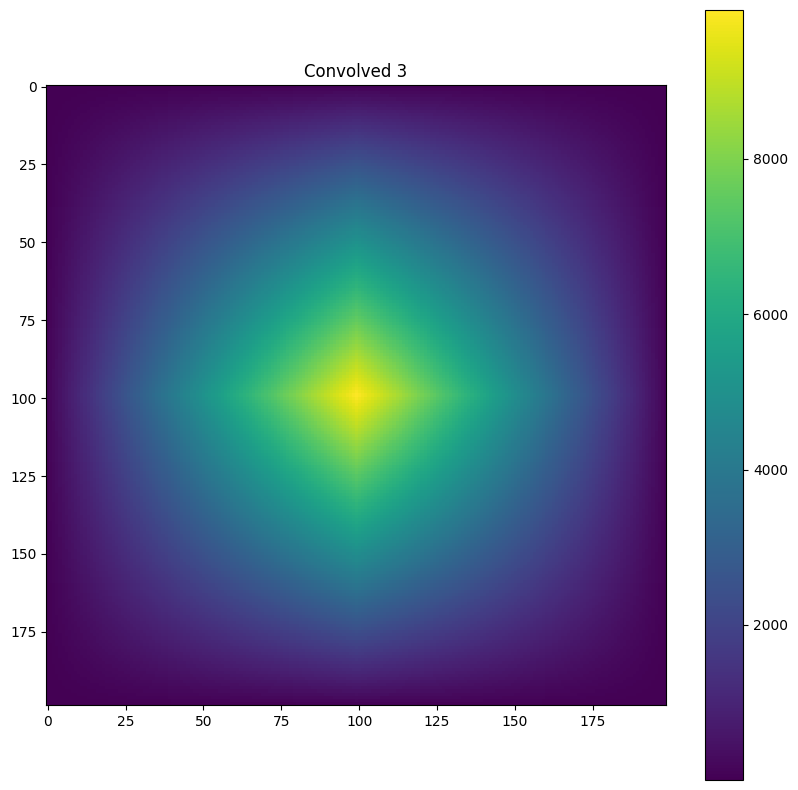

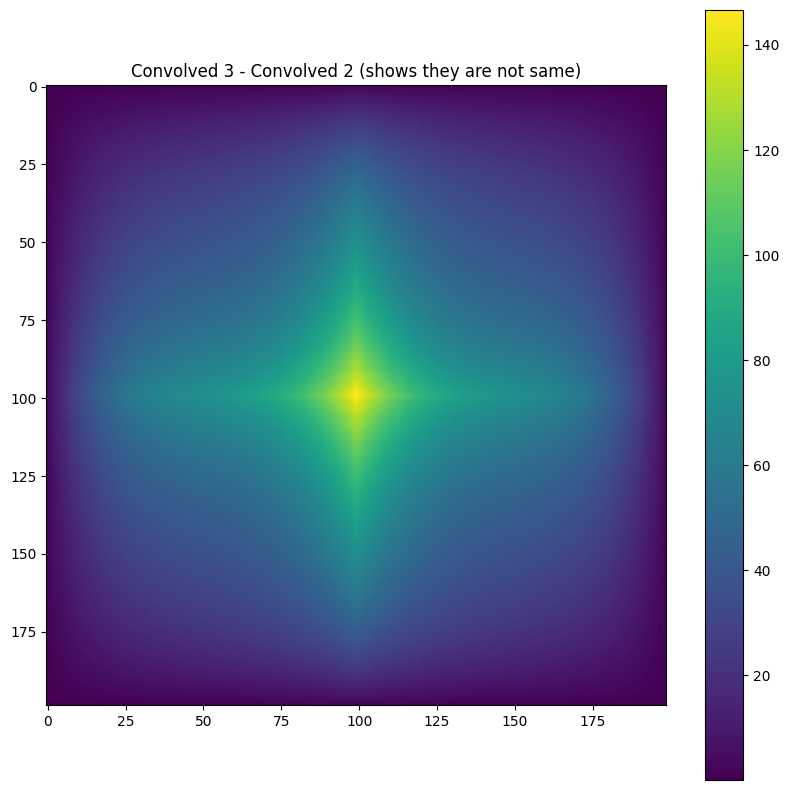

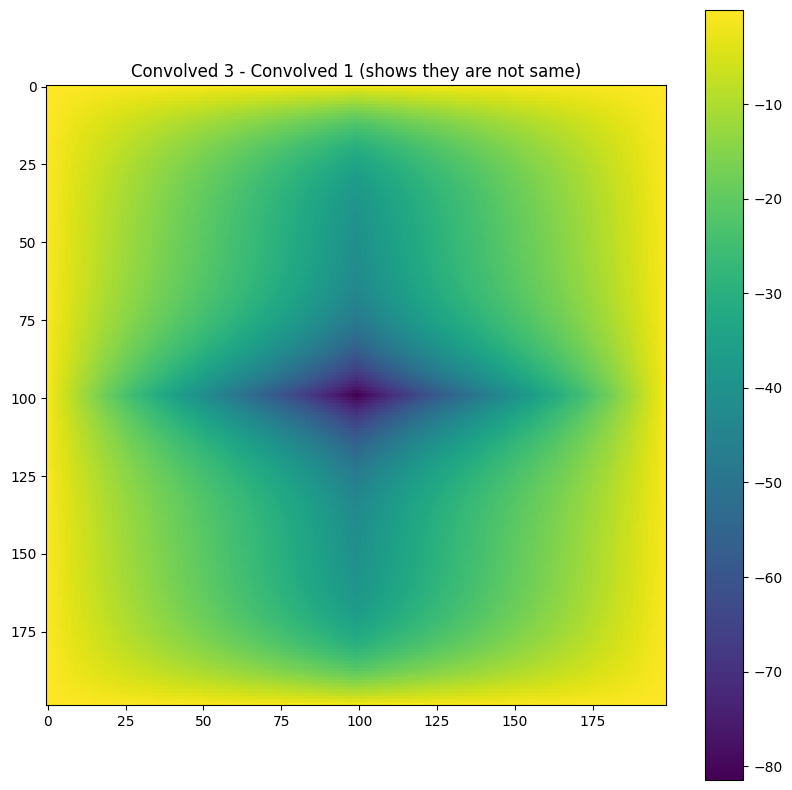

In [17]:
import scipy.signal as signal

convolved3 = signal.convolve2d(Funct_to_be_convolved_3a,Funct_to_be_convolved_3b)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved3)
plt.colorbar()
plt.title('Convolved 3')
plt.show()

# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved3 - convolved2)
plt.colorbar()
plt.title('Convolved 3 - Convolved 2 (shows they are not same)')
plt.show()

# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(convolved3 - convolved1)
plt.colorbar()
plt.title('Convolved 3 - Convolved 1 (shows they are not same)')
plt.show()

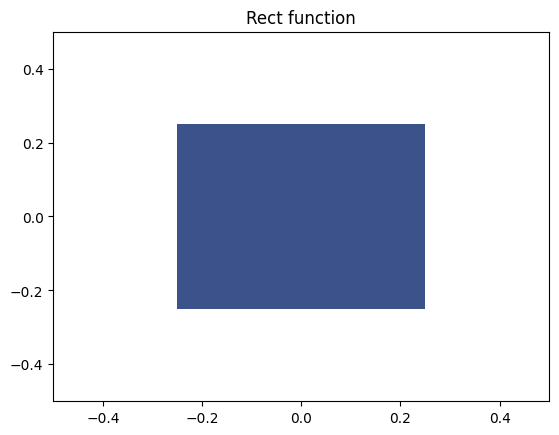

In [18]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w = 0.5

func_to_be_auto_corr1 = rect(X/(2*w))* rect(Y/(2*w))
plt.contourf(X, Y, func_to_be_auto_corr1)
plt.title("Rect function")
plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.show()

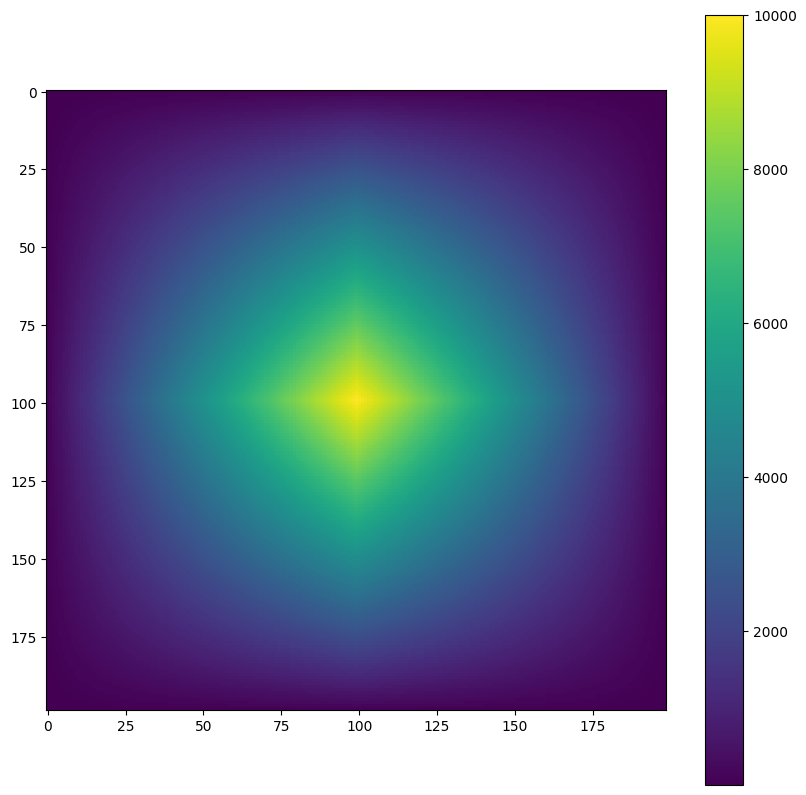

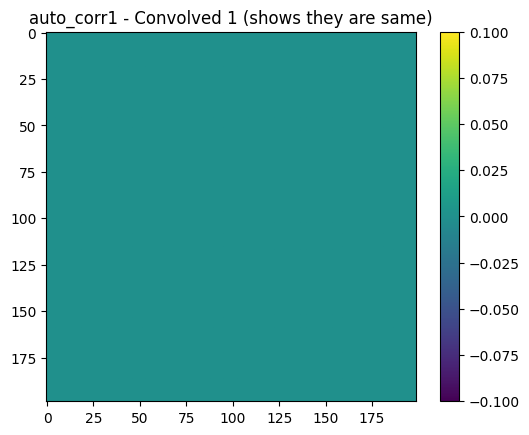

In [19]:
# find autocorrelation of func_
auto_corr1 = signal.correlate2d(func_to_be_auto_corr1, func_to_be_auto_corr1)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(auto_corr1)
plt.colorbar()
plt.show()

plt.imshow(auto_corr1 - convolved1)
plt.colorbar()
plt.title('auto_corr1 - Convolved 1 (shows they are same)')
plt.show()

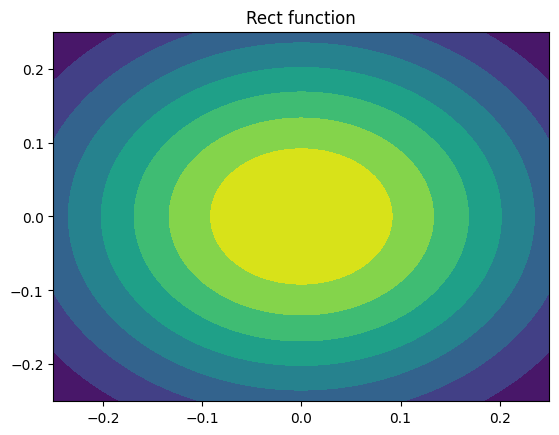

In [20]:
L = 0.5
M = 100
x = np.linspace(-L / 2, L / 2, M)
y = x
X, Y = np.meshgrid(x, y)
w = 0.5

func_to_be_auto_corr2 = np.exp(-np.pi*(X**2 + Y**2)/w**2)
plt.contourf(X, Y, func_to_be_auto_corr2)
plt.title("Rect function")
plt.show()

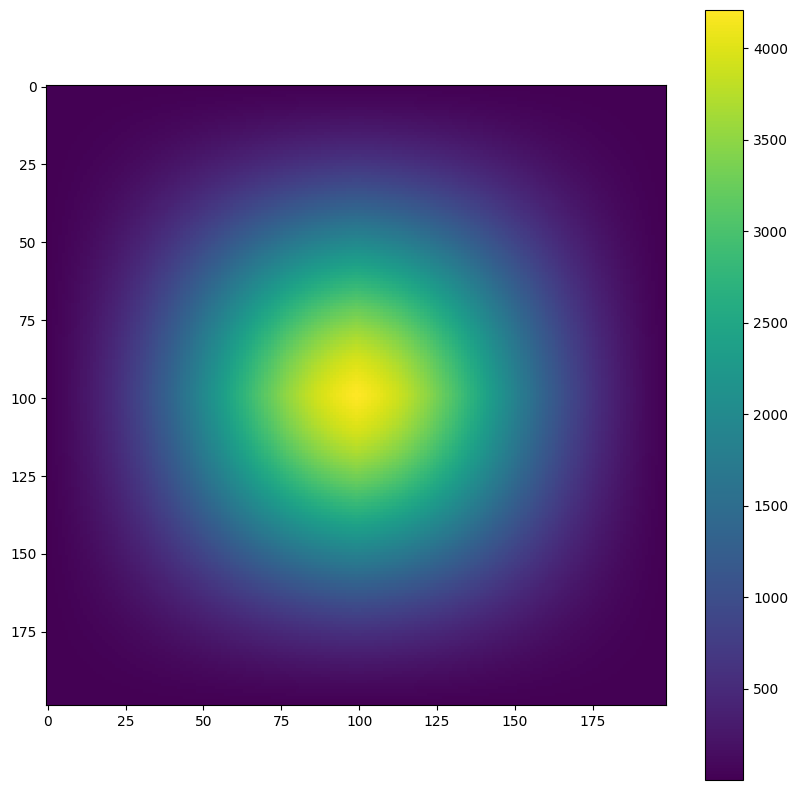

In [21]:
# find autocorrelation of func_
auto_corr2 = signal.correlate2d(func_to_be_auto_corr2, func_to_be_auto_corr2)
# visualize convulation result
plt.figure(figsize=(10, 10))
plt.imshow(auto_corr2)
plt.colorbar()
plt.show()


# CHAPTER 2

Sampled Functions and the Discrete Fourier Transform

# CH 2.1

Sampling and the Shannon–Nyquist Sampling Theorem

2D analytical function:

$$
g(x, y) → g(mΔx ,nΔy)
$$

where the sample interval is $Δx$ in x direction and  $Δy$ in y direction, and m
and n are integer-valued indices of the samples.

The respective sample rates are $1/Δx$ and $1/Δy$
let $m = -M/2, ... , M/2 -1$ and $n = -N/2, ... , N/2 -1$;

M and N are even.
Finite physical area = Lx*Ly (side lengths)

$L_x = MΔx, L_y = NΔy$

An obvious sampling concern is whether all the significant values of g(x,y)
“fit” within the physical area defined by $L_x * LY$. The support of g(x,y) refers to the span of the significant values.

If $D_x$ is the support in the x direction and $D_y$ is the support in the y direction, then for the significant values of g(x,y) to be contained within the array requires $$D_x < L_x , D_y < L_y$$

----------------------------------------

* 2.1 For a sample interval of $Δx = 10 μm$ and side length L = 5 mm, what is the **sample number M**? What is the **Nyquist frequency**? What is the **frequency sample interval**? What is the **range of coordinates in the spatial domain**? What is the **range of the coordinates in the frequency domain**?
-----------------------------------------
* 2.2 Consider the following:
$$g(x,y) = circ(sqrt(x^2 +y^2)/ w), w = 1mm$$
$$g(x,y) = exp(- (x^2 +y^2)/ w^2), w = 1mm$$ For each function determine the following:
  * (1) the **effective bandwidth**;
  * (2) the **maximum sample interval $Δx$** necessary to satisfy the sampling theorem given the effective bandwidth; and
  * (3) assuming 256 samples (linear dimension), the **maximum side length** that can be modeled.

----------------------------------------
* 2.3 What is the **support of** the following function along one dimension if the support is defined by where the function value drops to 1% of its peak?
$$g(x,y = exp(-π^2 (x^2 + y^2)/ w^2))$$

----------------------------------------

* 2.4 What is the **bandwidth along one axis** for the following?
  * $$sinc(x/w) * sinc(y/w)$$
  * $$sinc^2(x/w) * sinc^2(y/w)$$

----------------------------------------

* 2.5 Consider the following two functions:
$$g_1(x,y) = Λ(x/d) * Λ(y/2d)$$
$$g_2(x,y) = circ(sqrt(x^2 + y^2)/ d)$$

  * (a) What is the **minimum side length** required to accommodate a *convolution* of these two functions?

  * (b) What is the **minimum side length required** to accommodate the *autocorrelation* of $g2(x, y)$?

----------------------------------------




### P2.1

* 2.1 For a sample interval of $Δx = 10 μm$ and side length L = 5 mm, what is the **sample number M**? What is the **Nyquist frequency**? What is the **frequency sample interval**? What is the **range of coordinates in the spatial domain**? What is the **range of the coordinates in the frequency domain**?

In [22]:
delta_x = 10e-6  # 10 μm
L = 5e-3  # 5 mm

# Calculate the sample number M
M = L / delta_x

# Calculate the Nyquist frequency
nyquist_frequency = 1 / (2 * delta_x)

# Calculate the frequency sample interval
frequency_sample_interval = 1 / L

# Calculate the range of coordinates in the spatial domain
spatial_range = [-L / 2, L / 2]

# Calculate the range of coordinates in the frequency domain
frequency_range = [-nyquist_frequency, nyquist_frequency]

print(f" M: {np.round(M)}\n Nyquist frequency: {np.round(nyquist_frequency)}\n Frequency sample interval: {frequency_sample_interval}\n Spatial range: {spatial_range}\n Frequency range: {np.round(frequency_range)}")


 M: 500.0
 Nyquist frequency: 50000.0
 Frequency sample interval: 200.0
 Spatial range: [-0.0025, 0.0025]
 Frequency range: [-50000.  50000.]


### P2.2

* 2.2 Consider the following:
$$g(x,y) = circ(sqrt(x^2 +y^2)/ w), w = 1mm$$
$$g(x,y) = exp(- (x^2 +y^2)/ w^2), w = 1mm$$ For each function determine the following:
  * (1) the **effective bandwidth**;
  * (2) the **maximum sample interval $Δx$** necessary to satisfy the sampling theorem given the effective bandwidth; and
  * (3) assuming 256 samples (linear dimension), the **maximum side length** that can be modeled.

* $EffectiveBandwidth = 1/w =  1/1mm $
* Maximum sample interval $Δx = 1/ (2* EffectiveBandwidth) = 1/ (2* 1 mm^-1) = 0.5 mm$
* Maximum side length: With 256 samples, $256 * Δx = 128 mm$



In [23]:
w = 1 # mm
Effective_bandwidth = 1/w # mm^-1
Maximum_sample_interval = 1/ (2* Effective_bandwidth)
Maximum_side_length = 256 * Maximum_sample_interval
print(f"Effective bandwidth: {Effective_bandwidth} mm^-1 \nMaximum sample interval: {Maximum_sample_interval} mm \nMaximum side length: {Maximum_side_length} mm")

Effective bandwidth: 1.0 mm^-1 
Maximum sample interval: 0.5 mm 
Maximum side length: 128.0 mm


### P2.3

* 2.3 What is the **support of** the following function along one dimension if the support is defined by where the function value drops to 1% of its peak?
$$g(x,y = exp(-π^2 (x^2 + y^2)/ w^2))$$

In [24]:
from sympy import symbols, exp, pi, solve

# Define the variables and the function g(x, y)
x, y, w = symbols('x y w')
g = exp(-pi**2 * (x**2 + y**2) / w**2)

# Set y = 0 to examine the function along one dimension (x-axis)
g_x = g.subs(y, 0)

# Find the value of x where the function value drops to 1% of its peak (peak is at g(0,0) = 1)
threshold = 0.01
equation = g_x - threshold

# Solve for x
x_values = solve(equation, x)
x_values
print(f"Support is {x_values}")


Support is [-0.683082201582444*w, 0.683082201582444*w]


### P2.4

* 2.4 What is the **bandwidth along one axis** for the following?
  * $$sinc(x/w) * sinc(y/w)$$
  * $$sinc^2(x/w) * sinc^2(y/w)$$


for $sinc(x/w)$
zeros occur at $\pm k*w*\pi$ where $k = 1, 2, 3, ...$, therefore, bandwidth along one axis is $2\pi w$


### P2.5
* 2.5 Consider the following two functions:
$$g_1(x,y) = Λ(x/d) * Λ(y/2d)$$
$$g_2(x,y) = circ(sqrt(x^2 + y^2)/ d)$$

  * (a) What is the **minimum side length** required to accommodate a *convolution* of these two functions?

  * (b) What is the **minimum side length required** to accommodate the *autocorrelation* of $g2(x, y)$?

-----------------------------------------------------------------------


**Part (a): Minimum Side Length for Convolution**

For the convolution of
$$g_1(x,y) = \Lambda\left(\frac{x}{d}\right) \times \Lambda\left(\frac{y}{2d}\right)$$
and
$$g_2(x,y) = \text{circ}\left(\sqrt{x^2 + y^2}/d\right):$$

- $g_1$ has a support of $2d$ along the x-axis and $4d$ along the y-axis.
- $g_2$ has a circular support with a diameter of $2d$.

The minimum side length required to accommodate the convolution along each axis would be:

- Along the x-axis: $2d + 2d = 4d$
- Along the y-axis: $4d + 2d = 6d$

Thus, the required side length for convolution would be $6d$ along the y-axis (as it is larger).

**Part (b): Minimum Side Length for Autocorrelation of $g_2(x, y)$**

For the autocorrelation of
$$g_2(x,y) = \text{circ}\left(\sqrt{x^2 + y^2}/d\right):$$

- $g_2$ has a circular support with a diameter of $2d$.
- The autocorrelation will result in a support twice the size of the original, giving a diameter of $4d$.

Therefore, the minimum side length required to accommodate the autocorrelation of $g_2(x, y)$ is $4d$.

-----------------------------------------------------------------------


# CHAPTER 3

Functions, Vectors, Arrays,
and Fourier Transforms

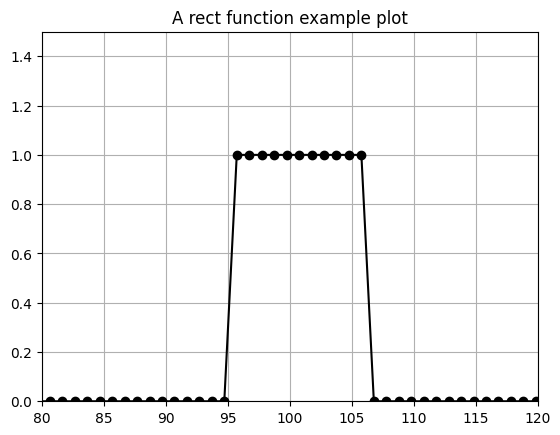

In [25]:
w = 0.055 * 100
L = 2
M = 200
dx = L/M
x = (np.linspace(-L/2, L/2, M) + np.ones(M) / 2)* 100
f = rect(x/(2*w))
f = fftshift(f)
plt.plot(x, f, 'k-o')
plt.grid(True)
plt.title("A rect function example plot")
plt.xlim([80, 120])
plt.ylim([0, 1.5])
plt.show()


## 3.3 Shift for FFT

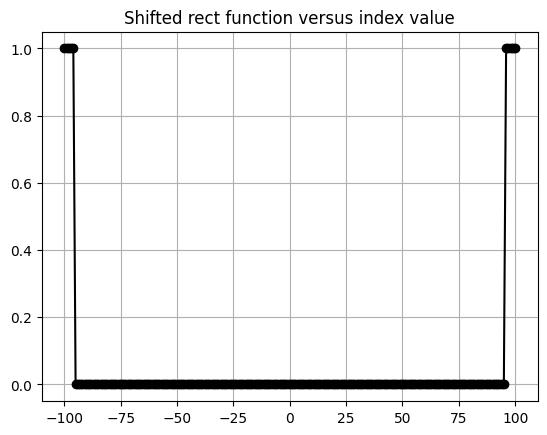

In [26]:
x = (np.linspace(-L/2, L/2, M))* 100
f = rect(x/(2*w))
f0 = fftshift(f)

plt.plot(x, f0, 'k-o')
plt.grid(True)
plt.title("Shifted rect function versus index value")
plt.show()

## 3.4 Computing the FFT and Displaying Results

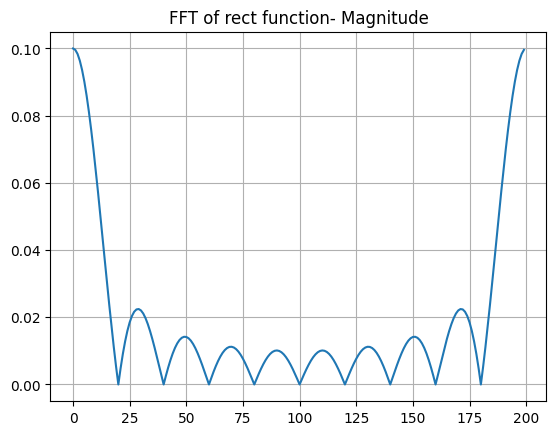

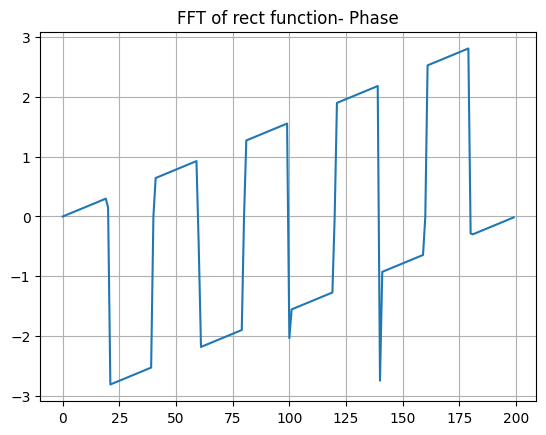

In [27]:
from numpy.fft import fft, fftfreq, fftshift
F0 =fft(f0) * dx


plt.plot(np.abs(F0))
plt.grid(True)
plt.title("FFT of rect function- Magnitude")
plt.show()


## ERROR ## ## ERROR ## ## ERROR ## ## ERROR ##

plt.plot(np.angle(F0))
plt.grid(True)
plt.title("FFT of rect function- Phase")
plt.show()

## ERROR ## ## ERROR ## ## ERROR ## ## ERROR ##


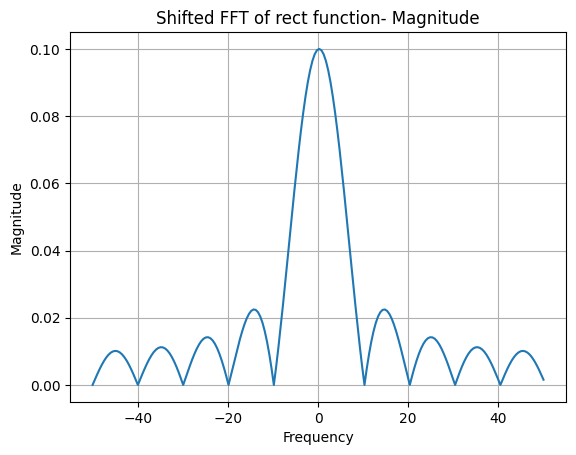

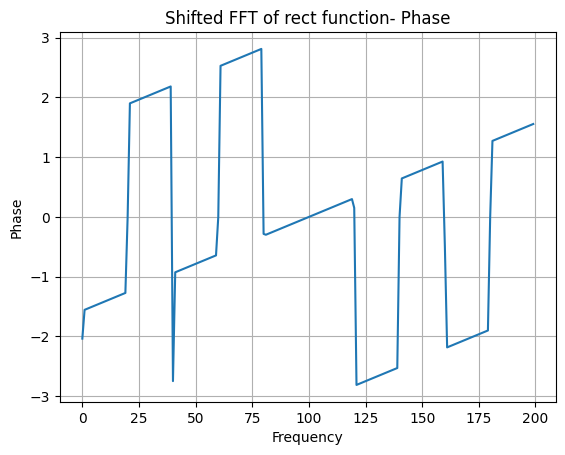

In [28]:
F = fftshift(F0)
fx = np.linspace(-M/(2*L), M/(2*L), M)

plt.plot(fx, np.abs(F))
plt.grid(True)
plt.title("Shifted FFT of rect function- Magnitude")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

plt.plot(np.angle(F))
plt.grid(True)
plt.title("Shifted FFT of rect function- Phase")
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.show()

## 3.6 Comparison with Analytic Results


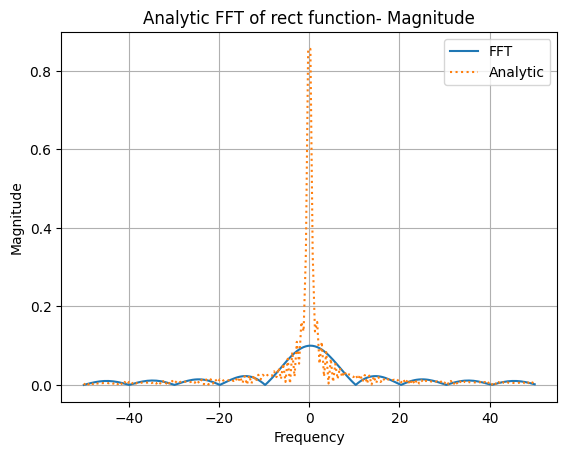

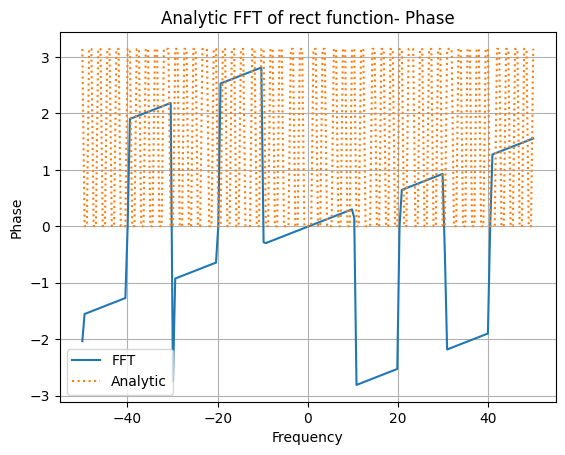

In [29]:
F_an = 2*w*np.sinc(2*w*fx)
plt.plot(fx, np.abs(F),fx,np.abs(F_an),':' )
plt.grid(True)
plt.title("Analytic FFT of rect function- Magnitude")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend(['FFT', 'Analytic'])
plt.show()

plt.plot(fx, np.angle(F),fx,np.angle(F_an),':' )
plt.grid(True)
plt.title("Analytic FFT of rect function- Phase")
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.legend(['FFT', 'Analytic'])
plt.show()

## 3.6 Convolution Example
A convolution can be performed using the FFT and applying the Fourier
convolution theorem.

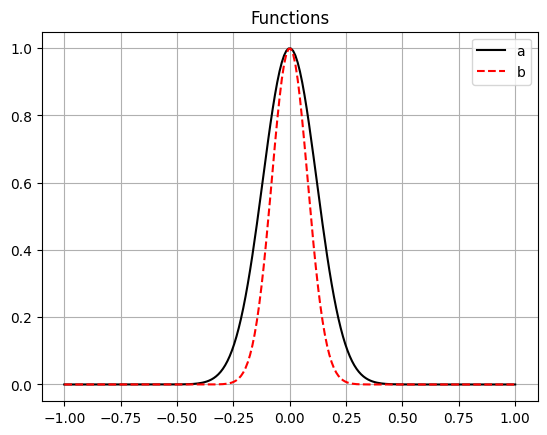

In [30]:
wa = 0.3
wb = 0.2
L = 2
M = 200
dx = L/M

x = np.linspace(-L/2, L/2, M)
fa = np.exp(-np.pi * (x**2)/wa**2)
fb = np.exp(-np.pi * (x**2)/wb**2)

plt.plot(x, fa, '-k')
plt.plot(x, fb, '--r')
plt.grid(True)
plt.title("Functions")
plt.legend(['a', 'b'])
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


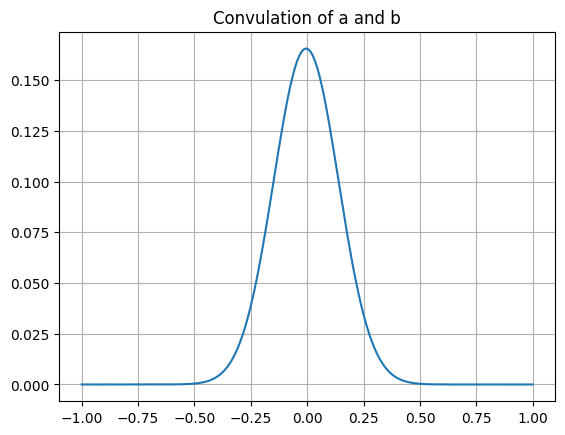

In [31]:
Fa = fft(fa)
Fb = fft(fb)

F0 = Fa * Fb
f0 = ifft(F0) * dx
f0 = ifft(F0) * dx
f = fftshift(f0)

plt.plot(x,f)
plt.grid(True)
plt.title("Convulation of a and b")
plt.show()

## 3.7 Two Dimensions
Physical optics problems typically involve at least two spatial dimensions

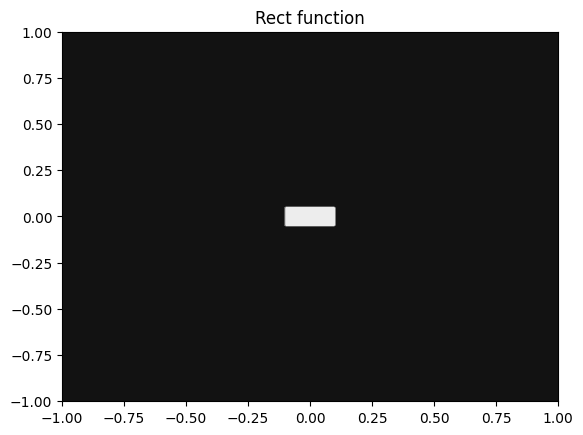

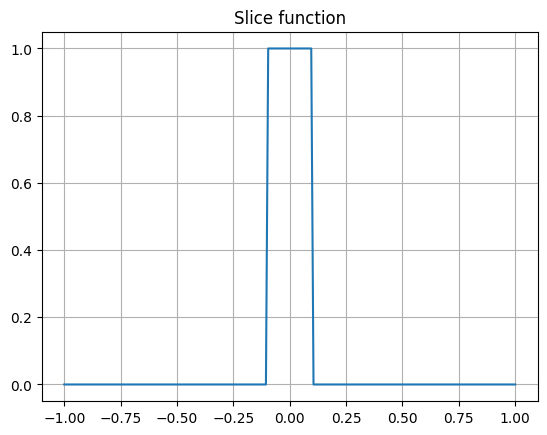

In [32]:
wx = 0.1
wy = 0.05
L = 2
M = 200
dx = L/M

x = np.linspace(-L/2, L/2, M)
y = x
X, Y = np.meshgrid(x, y)
g = rect(X/(2*wx))* rect(Y/(2*wy))

plt.contourf(X, Y, g, cmap = "gray")
plt.title("Rect function")
plt.show()

plt.plot(x,g[int(M/2 + 1), :])
plt.grid(True)
plt.title("Slice function")
plt.show()

To perform a 2D FFT of the rectangle function, add the following:

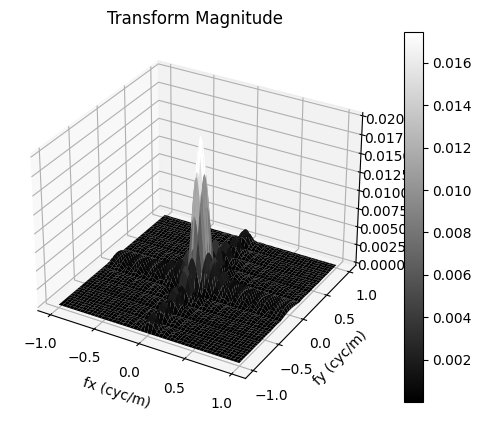

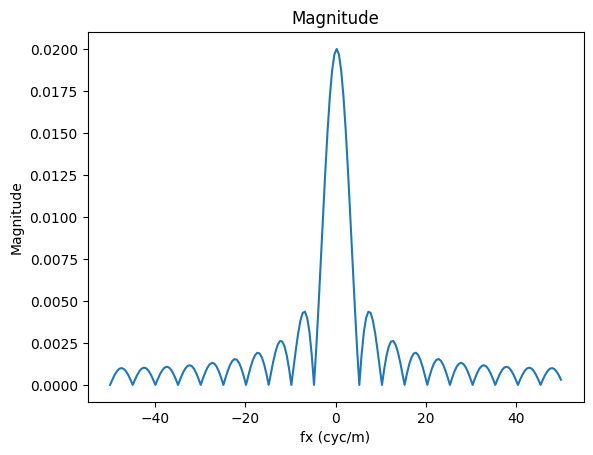

In [33]:
from mpl_toolkits.mplot3d import Axes3D
g0 = fftshift(g)
G0 = fft2(g0) * dx**2
G = fftshift(G0)
fx = np.linspace(-M/(2*L), M/(2*L), M)
fy = fx
FX, FY = np.meshgrid(fx, fy)


# Figure 3: Display transform magnitude (3D surface plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(G), cmap='gray')

# Lighting effect in Python is achieved with color shading, not direct lighting like MATLAB
plt.xlabel('fx (cyc/m)')
plt.ylabel('fy (cyc/m)')
plt.title('Transform Magnitude')
plt.colorbar(surf)

# Figure 4: Plot fx slice profile (2D line plot)
plt.figure()
plt.plot(fx, np.abs(G[M//2, :]))
plt.title('Magnitude')
plt.xlabel('fx (cyc/m)')
plt.ylabel('Magnitude')

plt.show()


## 3.9 Exercises


### P 3.1 Triangle function:
(a) Create a triangle function in an M-file. Try some lines like:
 T=1-abs(x);
 ask=abs(x)<=1;
 out=T.*mask;

(b) In a script, create a sampled triangle function using the following
specifications: triangle base half width = 0.1 m, vector length = 2 m,
and number of samples M = 200.

(c) Plot the sampled function.

(d) Compute the FFT.

(e) Find the analytic Fourier transform of the function in (b).

(f) Plot the FFT and analytic Fourier transform results together (both
magnitude and phase).

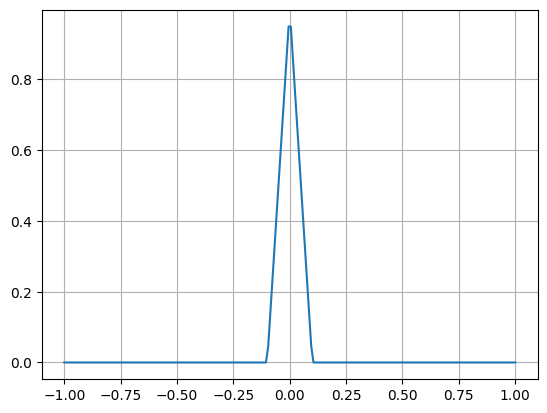

In [34]:
# (a), (b) and (c)
import numpy as np
vector_length = 2
M = 200
base_half_width = 0.1

def triangle_function(x):
    T = 1 - np.abs(x)
    mask = np.abs(x) <= 1
    return T * mask

x = np.linspace(-vector_length/2, vector_length/2, M)
out = triangle_function(x / base_half_width)

# plot
import matplotlib.pyplot as plt
plt.plot(x, out)
plt.grid(True)
plt.show()


In [35]:
# (d)
from numpy.fft import fft, fftfreq
fft_values = np.fft.fft(out)
frequencies = np.fft.fftfreq(M)

In [36]:
# (e)
def analytic_fourier_transform(f):
    base_width = 2 * base_half_width
    return (2 / (np.pi**2 * base_width**2)) * (1 - np.cos(np.pi * f * base_width)) / (f**2)

analytic_fft_values = analytic_fourier_transform(frequencies)


<ipython-input-36-a35f4776e842>:4: RuntimeWarning: invalid value encountered in divide
  return (2 / (np.pi**2 * base_width**2)) * (1 - np.cos(np.pi * f * base_width)) / (f**2)


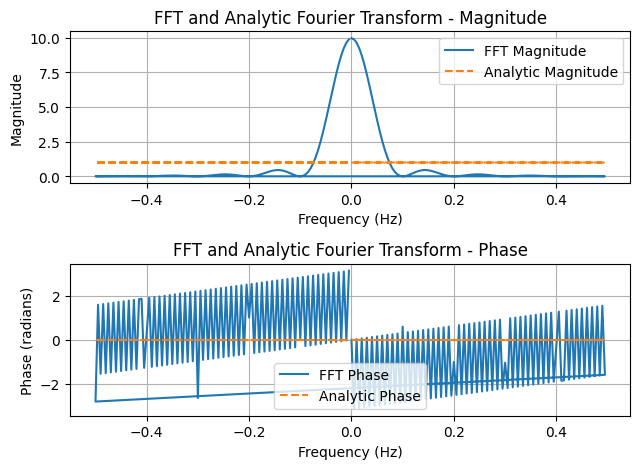

In [37]:
# (f)
plt.figure()

# FFT magnitude
plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(fft_values), label="FFT Magnitude")
plt.plot(frequencies, np.abs(analytic_fft_values), label="Analytic Magnitude", linestyle="--")
plt.title("FFT and Analytic Fourier Transform - Magnitude")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)

# FFT phase
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.angle(fft_values), label="FFT Phase")
plt.plot(frequencies, np.angle(analytic_fft_values), label="Analytic Phase", linestyle="--")
plt.title("FFT and Analytic Fourier Transform - Phase")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### P 3.2
Code the example for the convolution of the Gaussian functions presented in
Section 3.6. Find the analytic convolution of these functions and compare
this result with the discrete result in a plot.

----------------------------------------------------------------------------

$$
(f_a * f_b)(x) = \int_{-\infty}^{\infty} \exp\left(-\frac{\pi x'^2}{w_a^2}\right) \exp\left(-\frac{\pi (x - x')^2}{w_b^2}\right) \, dx'
$$

Expanding the second exponential term:

$$
(f_a * f_b)(x) = \int_{-\infty}^{\infty} \exp\left(-\frac{\pi x'^2}{w_a^2} - \frac{\pi (x^2 - 2xx' + x'^2)}{w_b^2}\right) \, dx'
$$

Simplifying:

$$
(f_a * f_b)(x) = \int_{-\infty}^{\infty} \exp\left(-\pi \left( x'^2 \left(\frac{1}{w_a^2} + \frac{1}{w_b^2}\right) + \frac{x^2}{w_b^2} - \frac{2xx'}{w_b^2} \right)\right) \, dx'
$$

Completing the square:

$$
(f_a * f_b)(x) = \exp\left(-\frac{\pi x^2}{\left(w_a^2 + w_b^2\right)}\right) \int_{-\infty}^{\infty} \exp\left(-\pi A \left(x' - \frac{B}{A}\right)^2\right) \, dx'
$$

where:

$$
A = \frac{1}{w_a^2} + \frac{1}{w_b^2}, \quad B = \frac{x}{w_b^2}.
$$

The integral is a Gaussian integral, and its result is:

$$
(f_a * f_b)(x) = \sqrt{\frac{w_a^2 w_b^2}{w_a^2 + w_b^2}} \exp\left(-\frac{\pi x^2}{w_a^2 + w_b^2}\right)
$$

----------------------------------------------------------------------------


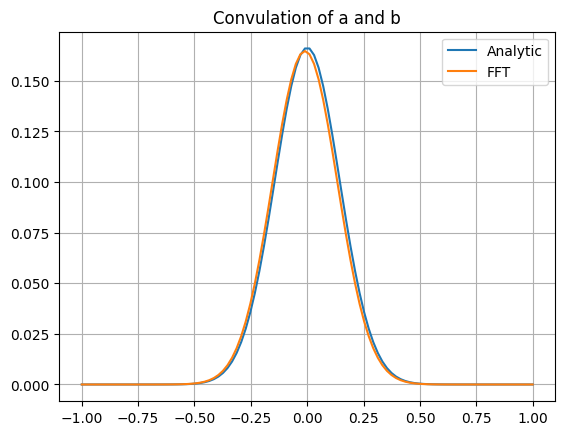

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift, fftfreq, fft2, ifft2
wa = 0.3
wb = 0.2
L = 2
M = 100
dx = L/M

x = np.linspace(-L/2, L/2, M)
fa = np.exp(-np.pi * (x**2)/wa**2)
fb = np.exp(-np.pi * (x**2)/wb**2)
wa = 0.3
wb = 0.2
# Write this function : (f_a * f_b)(x) = \sqrt{\frac{w_a^2 w_b^2}{w_a^2 + w_b^2}} \exp\left(-\frac{\pi x^2}{w_a^2 + w_b^2}\right)
fa_conv_fb = lambda x: np.sqrt(wa**2 * wb**2 / (wa**2 + wb**2)) * np.exp(-np.pi * x**2 / (wa**2 + wb**2))

y = fa_conv_fb(x)

plt.plot(x, y)

Fa = fft(fa)
Fb = fft(fb)

F0 = Fa * Fb
f0 = ifft(F0) * dx
f0 = ifft(F0) * dx
f = fftshift(f0)

plt.plot(x,f)
plt.grid(True)
plt.title("Convulation of a and b")
plt.legend(['Analytic', 'FFT'])
plt.show()

### 3.3 Circle function M-file:
(a) Create a circle function in an M-file.

(b) Generate a sampled circle function in a 2D array with the following
parameters: circle radius = 0.015 m, array side length = 0.2 m, and
number of samples (one dimension) M = 200.

(c) Display the sampled function as an image.

(d) Take the FFT of the array and display the magnitude of the transform
in surface and profile plots.

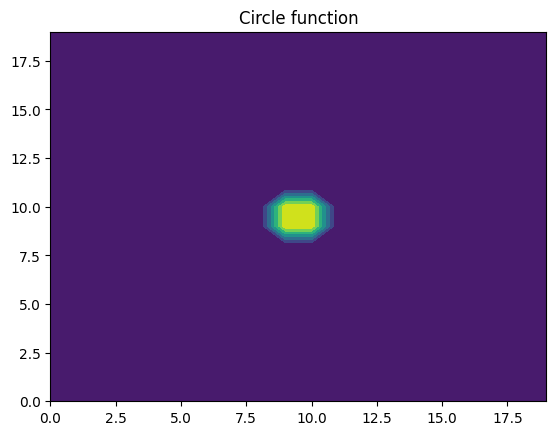

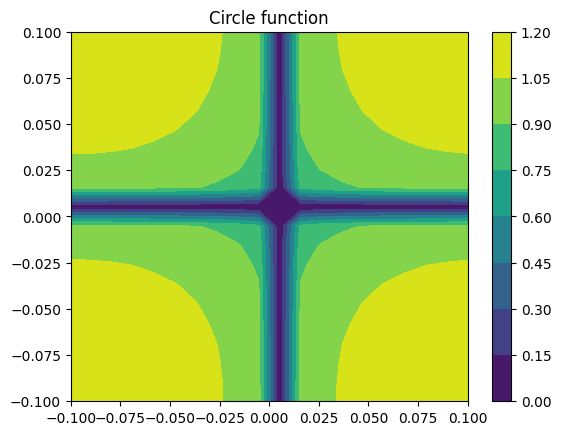

In [39]:
r = 0.015
L = 0.2
M = 20

# Visualization of the 1D functions
x = np.linspace(-L/2, L/2, M)
y = x
X, Y = np.meshgrid(x, y)
r = 0.015
circ_plot = circ(r)(X, Y)

plt.contourf(circ_plot)
plt.title("Circle function")
plt.show()

alpha = 0.1
FT2 = fft2(circ_plot)
plt.contourf(X, Y, np.abs(fft2(circ_plot))**alpha)
plt.title("Circle function")
plt.colorbar()
plt.show()




In [40]:
# This is just a fun animation. Not an important thing.
'''
from matplotlib.animation import FuncAnimation

# Create figure and axis for animation
fig, ax = plt.subplots()
contour = None  # Placeholder for the contour plot
colorbar = None  # Placeholder for the colorbar

# Update function for each frame of the animation
def update(alpha):
    global contour, colorbar
    if contour:
        for coll in contour.collections:
            coll.remove()  # Remove the previous contour plot
    FT2 = fft2(circ_plot)
    contour = ax.contourf(X,
                          Y,
                          np.abs(FT2)**alpha, cmap="viridis")

    ax.set_title(f"Game of Diffraction")

    # Create colorbar only once
    if colorbar is None:
        colorbar = plt.colorbar(contour, ax=ax)

# Animation function: change alpha from 0.1 to 0.5
alpha_values = np.arange(0.2, 0.3, 0.0002)
ani = FuncAnimation(fig, update, frames=alpha_values, interval=100)

# Display the animation
plt.show()

# Save the animation as a GIF (if you want)
ani.save('circle_function_animation2.gif', writer='imagemagick', fps=30)'''

'\nfrom matplotlib.animation import FuncAnimation\n\n# Create figure and axis for animation\nfig, ax = plt.subplots()\ncontour = None  # Placeholder for the contour plot\ncolorbar = None  # Placeholder for the colorbar\n\n# Update function for each frame of the animation\ndef update(alpha):\n    global contour, colorbar\n    if contour:\n        for coll in contour.collections:\n            coll.remove()  # Remove the previous contour plot\n    FT2 = fft2(circ_plot)\n    contour = ax.contourf(X,\n                          Y,\n                          np.abs(FT2)**alpha, cmap="viridis")\n\n    ax.set_title(f"Game of Diffraction")\n\n    # Create colorbar only once\n    if colorbar is None:\n        colorbar = plt.colorbar(contour, ax=ax)\n\n# Animation function: change alpha from 0.1 to 0.5\nalpha_values = np.arange(0.2, 0.3, 0.0002)\nani = FuncAnimation(fig, update, frames=alpha_values, interval=100)\n\n# Display the animation\nplt.show()\n\n# Save the animation as a GIF (if you want)

# CHAPTER 4 - Scalar Diffraction and Propagation Solutions


In [41]:
from scipy.special import jv

def jinc(x):
  mask = ( x!=0 )
  out = np.pi * np.ones(np.shape(x))
  out[mask] = jv(1, 2*np.pi*x[mask]) / (x[mask])
  return out

## Fraunhofer Irradiance

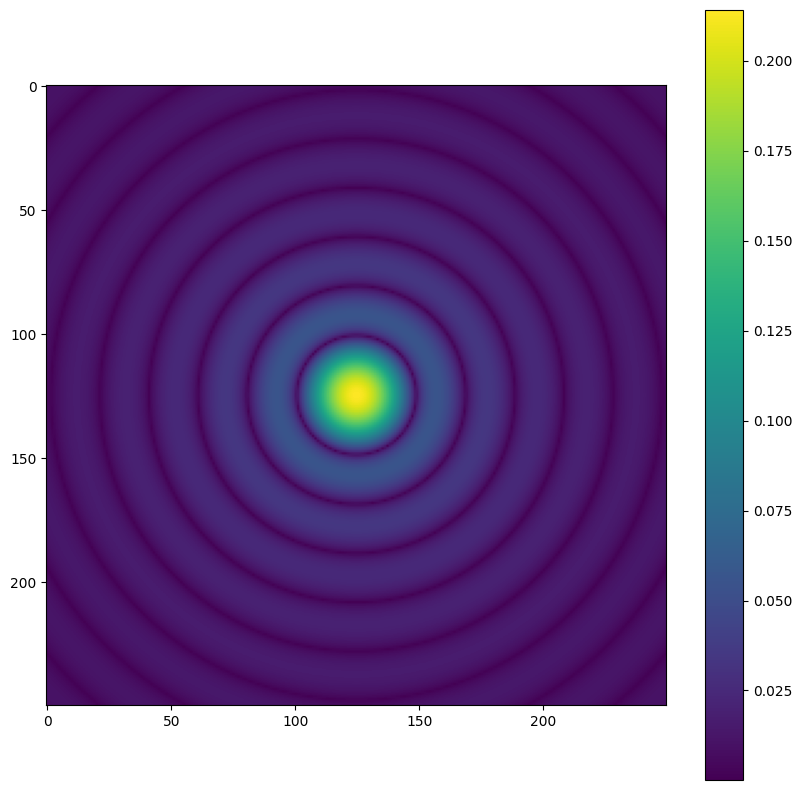

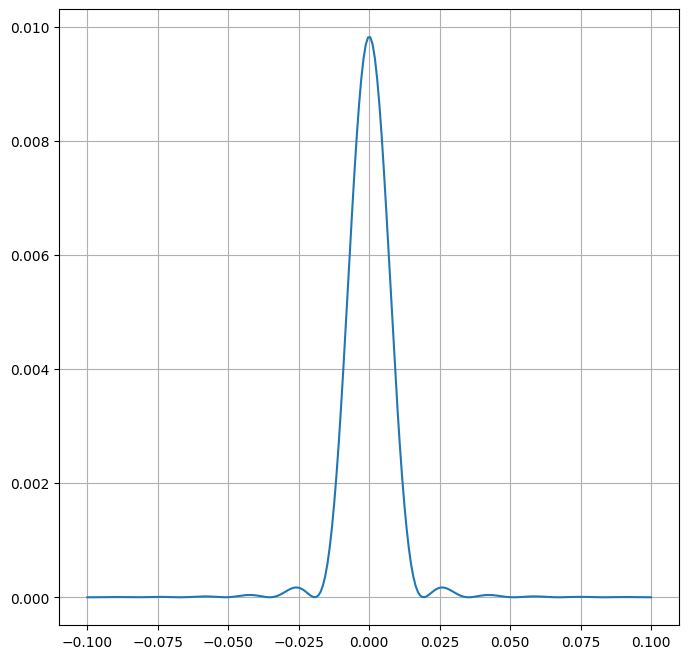

In [42]:
L = 0.2
M = 250
dx = L/M
x = np.linspace(-L/2, L/2, M)
y = x
X, Y = np.meshgrid(x, y)

w = 1e-3
lambda_ = 0.633e-6
z = 50
k = 2*np.pi/lambda_
lz = lambda_ * z

I2 = ((w**2 / lz)**2) * (jinc(w/lz * np.sqrt(X**2 + Y**2)))**2

plt.figure(figsize=(10, 10))
plt.imshow(I2**(1/3))
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(x, I2[int(M/2), :])
plt.grid(True)
plt.show()


### P 4.1
Consider a plane wave of wavelength $\lambda$ incident on two pieces of glass of different thicknesses and refractive indices as shown in Fig. 4.4.

 [ ... n1,d1 ... ]

 [ ... n2,d2 ........]

a' .................... b'

d2>d1

d2 = b'-a'

Find an expression for the optical path (length) difference (OPD) for the two parts of the beam between planes a and b.

--------------------------------------------

OPD = n*d

@ d1 (upper) OPD1 = n1*d1
@ d2 (lower) OPD2 = n2*d2

then,
OPD = OPD1 - OPD2 = n1*d1 - n2*d2





# CHAPTER 5 - Propagation Simulation

## 5.1 Fresnel Transfer Function (TF) Propagator

For Equation 5.1
$$
U_2(x,y) = \mathcal{F}^{-1} \left\{ \mathcal{F}\{U_1(x,y)\} H(f_x, f_y) \right\}
$$

For Equation 5.2
$$
H(f_x, f_y) = e^{ikz} \exp\left[-j\pi\lambda z (f_x^2 + f_y^2)\right]
$$


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift, fftfreq, fft2, ifft2, ifftshift

In [44]:
def propTF(u1, L, lamda, z):
    M, N = np.shape(u1)
    dx = L / M
    k = 2 * np.pi / lamda

    fx = np.linspace(-M/(2*L), M/(2*L), M) ; fy = fx
    FX, FY = np.meshgrid(fx, fy)


    H = np.exp(-1j* np.pi * lamda * z * (FX **2 + FY **2))
    H = fftshift(H)
    U1 = fft2(fftshift(u1))
    U2 = H* U1
    u2 = ifftshift(ifft2(U2))
    return u2

## 5.2 Fresnel Impulse Response (IR) Propagator

For Equation 5.3

$$
U_2(x,y) = \mathcal{S}^{-1} \left\{ \mathcal{S}\{U_1(x, y)\} \mathcal{S}\{h(x, y)\} \right\}
$$

For Equation 5.4

$$
h(x, y) = \frac{e^{ikz}}{j\lambda z} \exp\left[\frac{jk}{2z} (x^2 + y^2)\right]
$$


In [45]:
def propIR(u1,L,lamda,z):
    M, N = np.shape(u1)
    dx = L / M
    k = 2 * np.pi / lamda

    x = np.linspace(-L/2, L/2, M) ; y = x
    X, Y = np.meshgrid(x, y)

    h = 1 / (1j * lamda * z) * np.exp(1j * k / (2 * z) * (X ** 2 + Y ** 2))
    H = fft2(fftshift(h)) * dx ** 2
    U1 = fft2(fftshift(u1))
    U2 = H*U1
    u2 = ifftshift(ifft2(U2))

    return u2



## 5.3 Square Beam Example

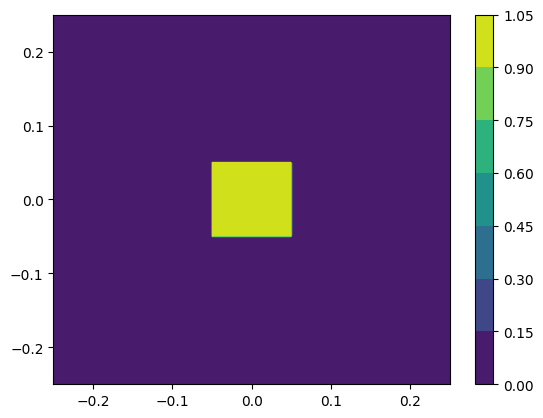

In [46]:
L1 = 0.5
M = 250
dx1 = L1/M
x1 = np.linspace(-L1/2, L1/2, M) ; y1 = x1
lamda = 0.5e-6

k=2*  np.pi/lamda
w=0.051
z=2000

X1,Y1 = np.meshgrid(x1,y1)

u1= rect(X1/(2*w)) * rect(Y1/(2*w))
I1=abs(u1 ** 2)

plt.contourf(x1,y1,I1)
plt.colorbar()
plt.show()


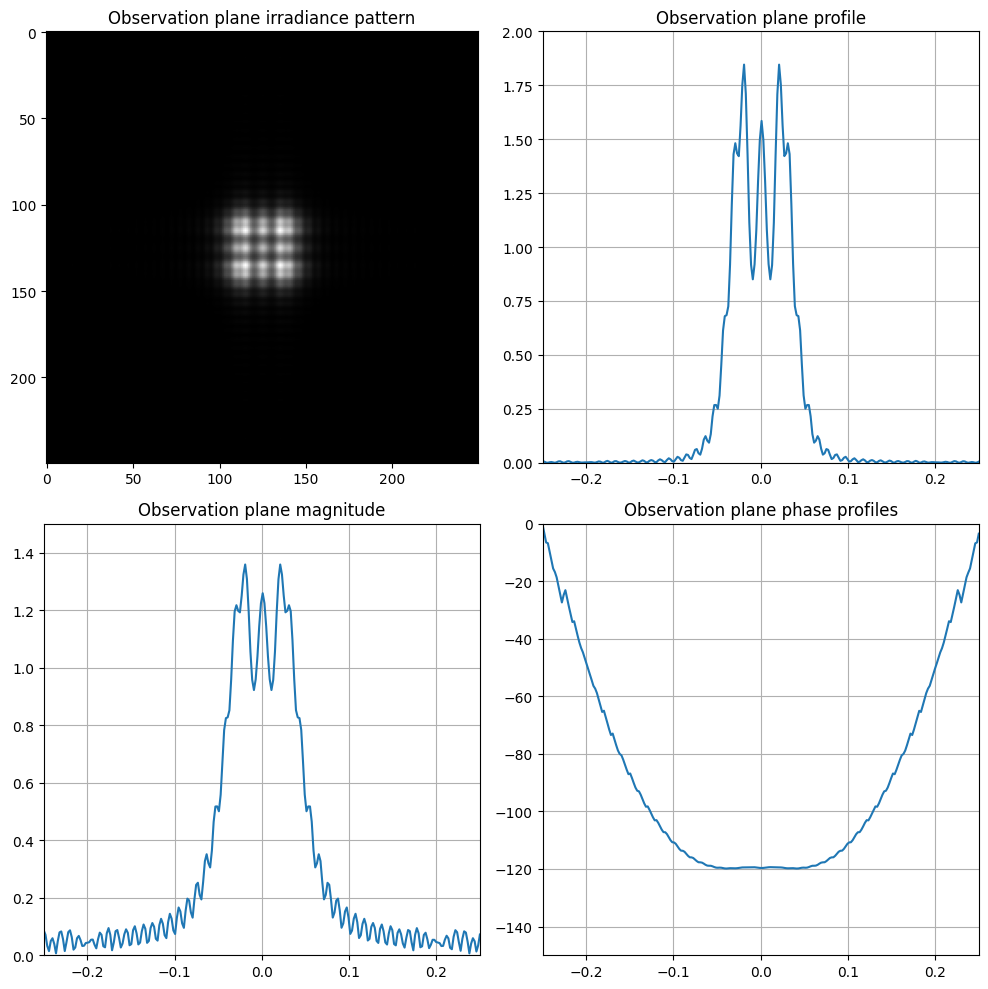

In [47]:
z = 2000
u2 = propTF(u1, L1, lamda, z)
x2 = x1
y2 = y1
I2 = abs(u2 ** 2)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid of subplots

# Top-left subplot: Contour plot of the irradiance pattern
contour = axs[0, 0].imshow(I2,cmap='gray') #contourf(x1, y1, I2, cmap='gray')
axs[0, 0].set_title('Observation plane irradiance pattern')

# Top-right subplot: Plot of the central horizontal slice of I2
axs[0, 1].plot(x1, I2[int(M/2) +1, :])
axs[0, 1].grid(True)
axs[0, 1].set_title('Observation plane profile')
axs[0, 1].set_xlim([-0.25, 0.25])
axs[0, 1].set_ylim([0, 2])

# Bottom-left subplot: Plot of the magnitude of the central horizontal slice of u2
axs[1, 0].plot(x2, np.abs(u2[int(M/2) + 1, :]))
axs[1, 0].grid(True)
axs[1, 0].set_title('Observation plane magnitude')
axs[1, 0].set_xlim([-0.25, 0.25])
axs[1, 0].set_ylim([0, 1.5])

# Bottom-right subplot: Unwrapped phase of the central horizontal slice of u2
axs[1, 1].plot(x2, np.unwrap(np.angle(u2[int(M/2) + 1, :])))
axs[1, 1].grid(True)
axs[1, 1].set_title('Observation plane phase profiles')
axs[1, 1].set_xlim([-0.25, 0.25])
axs[1, 1].set_ylim([-150, 0])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


## 5.4 Fresnel Propagation Sampling

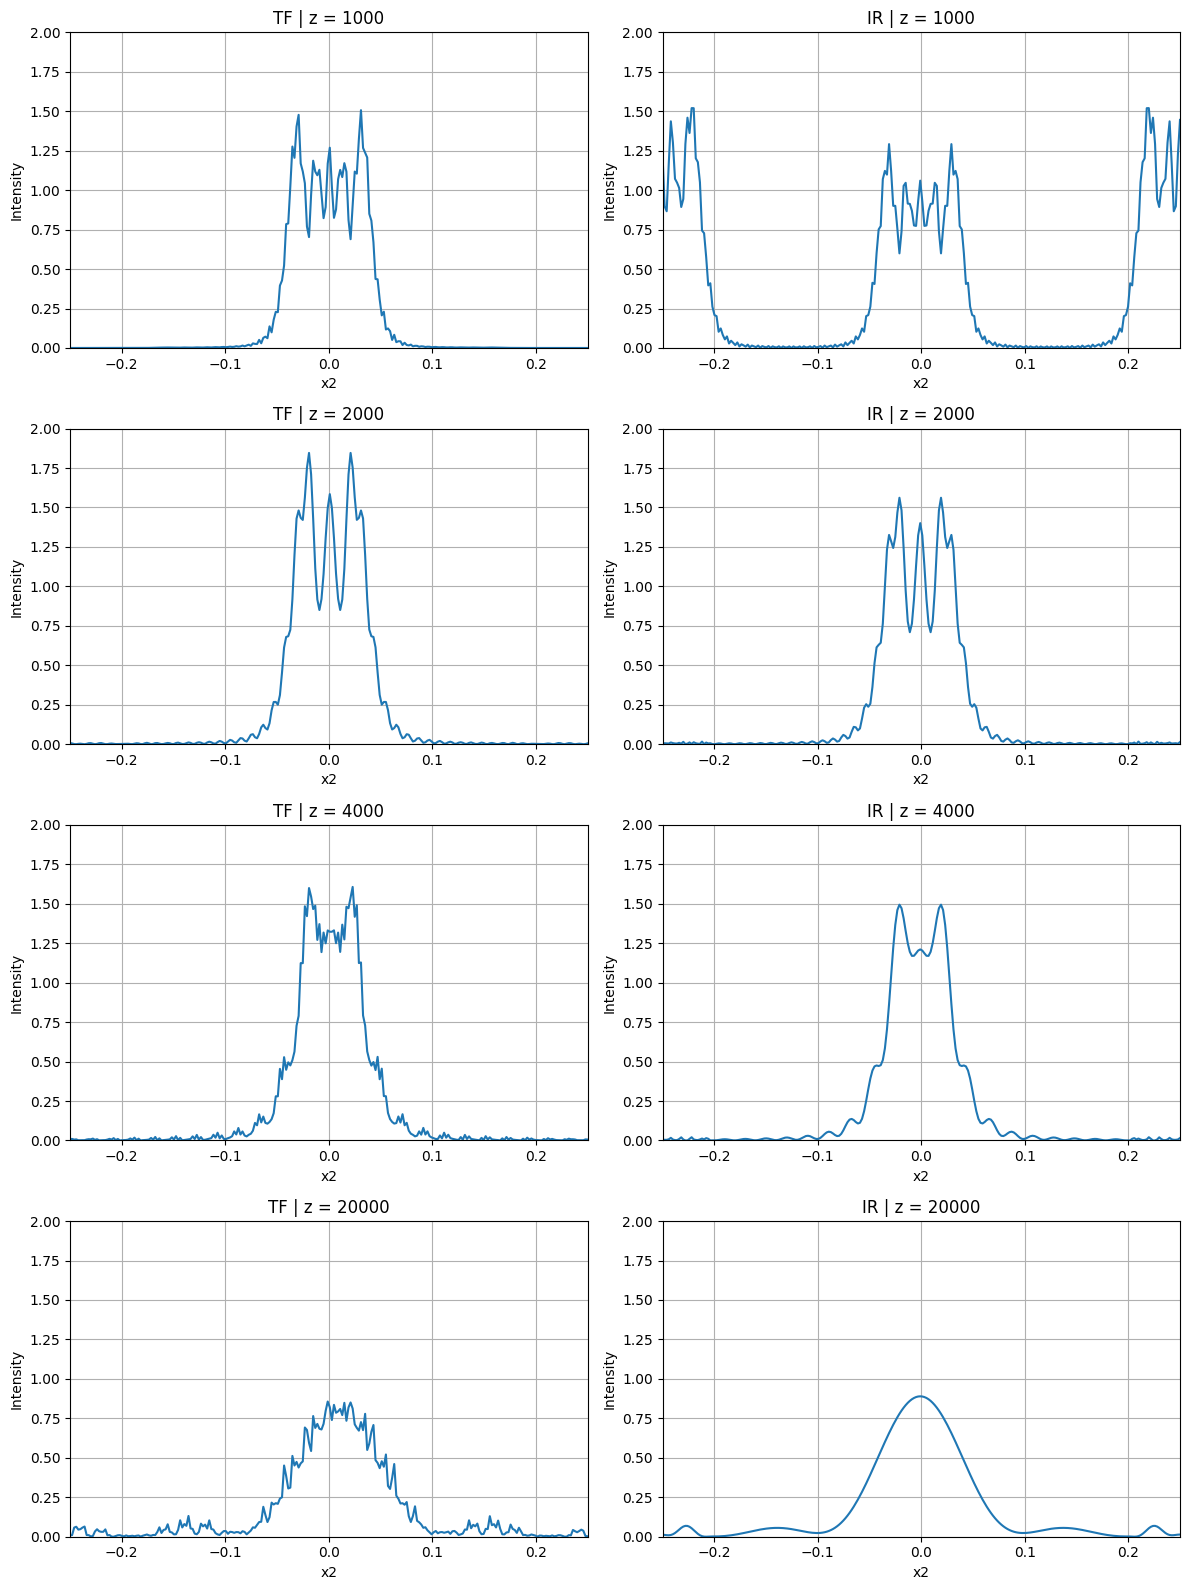

In [48]:
'''z = 1000
u2_ir = propIR(u1, L1, lamda, z)
x2 = x1
y2 = y1
I2_ir = abs(u2_ir ** 2)
'''

z_values = [1000, 2000, 4000, 20000]
rows = len(z_values)  # two rows of plots
cols = 2  # each column is a different z value

fig, axs = plt.subplots(rows, cols, figsize=(12, 16))

for i, z in enumerate(z_values):
    L1 = 0.5
    # Compute the fields and intensities for impulse response
    u2_ir = propIR(u1, L1, lamda, z)
    I2_ir = np.abs(u2_ir**2)

    # Compute the fields and intensities for transfer function
    u2_tf = propTF(u1, L1, lamda, z)
    I2_tf = np.abs(u2_tf**2)

    # Plotting the impulse response
    axs[i, 1].plot(x1, np.abs(u2_ir[int(M/2) + 1, :])**2)
    axs[i, 1].grid(True)
    axs[i, 1].set_title(f'IR | z = {z}')
    axs[i, 1].set_xlabel('x2')
    axs[i, 1].set_ylabel('Intensity')
    axs[i, 1].set_xlim([-0.25, 0.25])  # Set x-axis limits
    axs[i, 1].set_ylim([0, 2])  # Set y-axis limits

    # Plotting the transfer function response
    axs[i, 0].plot(x1, np.abs(u2_tf[int(M/2) + 1, :])**2)
    axs[i, 0].grid(True)
    axs[i, 0].set_title(f'TF | z = {z}')
    axs[i, 0].set_xlabel('x2')
    axs[i, 0].set_ylabel('Intensity')
    axs[i, 0].set_xlim([-0.25, 0.25])  # Set x-axis limits
    axs[i, 0].set_ylim([0, 2])  # Set y-axis limits

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




**Figure 5.4** Irradiance profiles (x axis) for the transfer function (TF) and impulse response
(IR) propagation approaches for propagation distances ranging from 1000 to 20,000 m.
“Spiky” and “stair-step” artifacts appear in (c) and (d); periodic copies appear in (e); and
spurious sidelobes appear in (h).


## 5.5 Fraunhofer Propagation

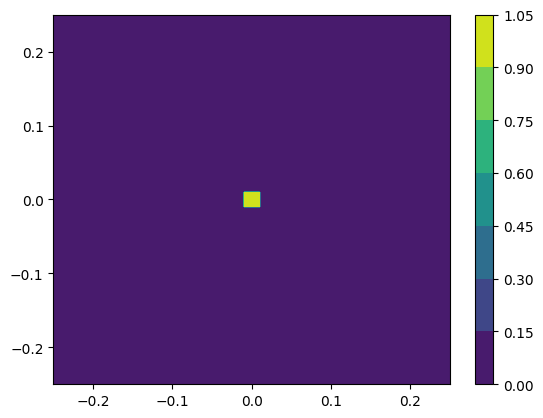

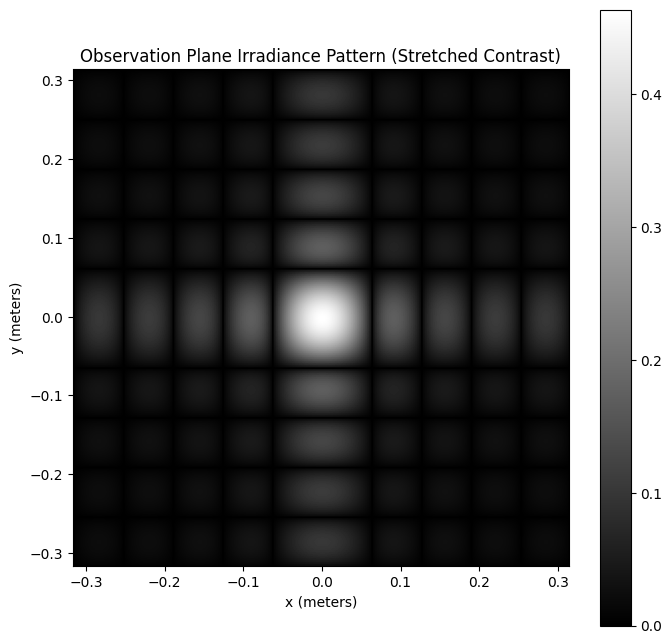

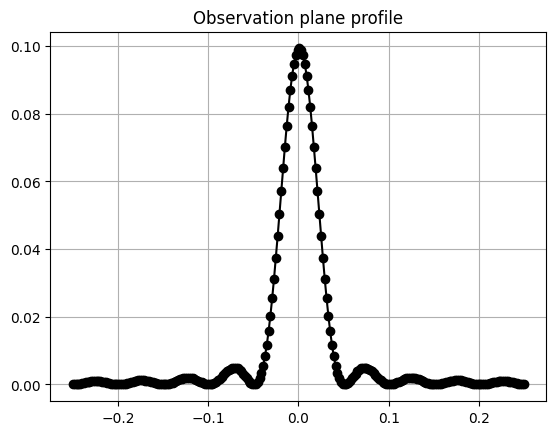

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def propFF(u1, L1, lambda_, z):
    """
    Propagation - Fraunhofer pattern
    Assumes uniform sampling

    Parameters:
    u1 : ndarray - Source plane field
    L1 : float - Source plane side length
    lambda_ : float - Wavelength
    z : float - Propagation distance

    Returns:
    u2 : ndarray - Observation plane field
    L2 : float - Observation plane side length
    """
    M, N = u1.shape  # Get input field array size
    dx1 = L1 / M  # Source sample interval
    k = 2 * np.pi / lambda_  # Wavenumber

    L2 = lambda_ * z / dx1  # Observation side length
    dx2 = lambda_ * z / L1  # Observation sample interval
    x2 = np.arange(-L2 / 2, L2 / 2, dx2)  # Observation coordinates

    X2, Y2 = np.meshgrid(x2, x2)  # Create 2D grid of observation coordinates
    c = 1 / (1j * lambda_ * z) * np.exp(1j * k / (2 * z) * (X2**2 + Y2**2))
    u2 = c * np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(u1))) * dx1**2

    return u2, L2

L1 = 0.5
M = 250
dx1 = L1/M
x1 = np.linspace(-L1/2, L1/2, M) ; y1 = x1
lamda = 0.5e-6

k=2*  np.pi/lamda
w=0.011
z=2000

X1,Y1 = np.meshgrid(x1,y1)

u1= rect(X1/(2*w)) * rect(Y1/(2*w))
I1=abs(u1 ** 2)

plt.contourf(x1,y1,I1)
plt.colorbar()
plt.show()


u2, L2 = propFF(u1, L1, lambda_, z)
dx2 = L2 / M
x2 = np.arange(-L2 / 2, L2 / 2, dx2)  # Observation coordinates
y2 = x2

# Visualization
I2 = np.abs(u2)**2  # Intensity at the observation plane
plt.figure(figsize=(8, 8))
plt.imshow(np.power(I2, 1/3), extent=(x2[0], x2[-1], y2[0], y2[-1]), cmap='gray')
plt.colorbar()
plt.title('Observation Plane Irradiance Pattern (Stretched Contrast)')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.show()


# Top-right subplot: Plot of the central horizontal slice of I2
plt.plot(x1, I2[int(M/2) +1, :],"-ok")
plt.grid(True)
plt.title('Observation plane profile')
plt.show()



# Chapter 6 Transmittance Functions, Lenses, and Gratings

## 6.1 Tilt

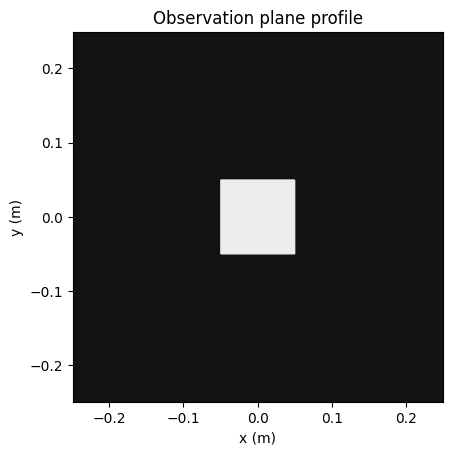

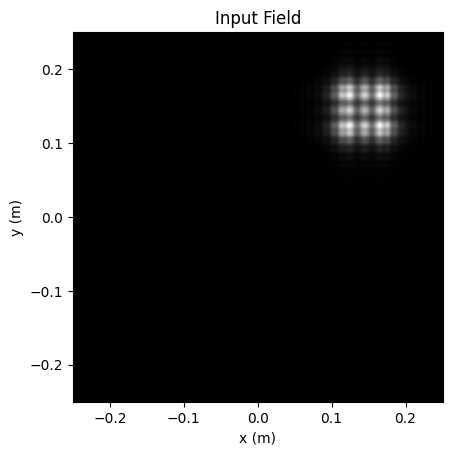

In [50]:
import numpy as np

def tilt(uin, L, lambda_, alpha, theta):
    """
    Tilt phasefront
    Assumes uniform sampling

    Parameters:
    uin : ndarray - Input field
    L : float - Side length
    lambda_ : float - Wavelength
    alpha : float - Tilt angle (radians)
    theta : float - Rotation angle (radians from x-axis)

    Returns:
    uout : ndarray - Output field with tilt applied
    """
    M, N = uin.shape  # Get input field array size
    dx = L / M  # Sample interval
    k = 2 * np.pi / lambda_  # Wavenumber

    x = np.linspace(-L/2, L/2, M)  # Coords
    X, Y = np.meshgrid(x, x)  # Create 2D grid

    # Apply tilt
    uout = uin * np.exp(1j * k * (X * np.cos(theta) + Y * np.sin(theta)) * np.tan(alpha))

    return uout


L1 = 0.5
M = 250
dx1 = L1/M
x1 = np.linspace(-L1/2, L1/2, M) ; y1 = x1
lamda = 0.5e-6

k=2*  np.pi/lamda
w=0.051
z=2000

X1,Y1 = np.meshgrid(x1,y1)

u1= rect(X1/(2*w)) * rect(Y1/(2*w))

plt.contourf(np.abs(u1) ** 2, extent=(x1.min(), x1.max(), y1.min(), y1.max()), cmap='gray',origin='lower')
plt.title('Observation plane profile')
plt.axis('square')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


deg = np.pi / 180  # Conversion factor to radians
alpha = 10.0e-5  # Tilt angle in radians
theta = 45 * deg  # Rotation angle in radians
u2 = tilt(u1, L1, lamda, alpha, theta)  # Apply tilt to u1

# Propagate field using Transfer Function
u3 = propTF(u2, L1, lamda, z)


plt.imshow(np.abs(u3) ** 2, extent=(x1.min(), x1.max(), y1.min(), y1.max()), cmap='gray',
                           origin='lower')
plt.axis('square')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Input Field')
plt.axis('square')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()






## 6.2 Focus

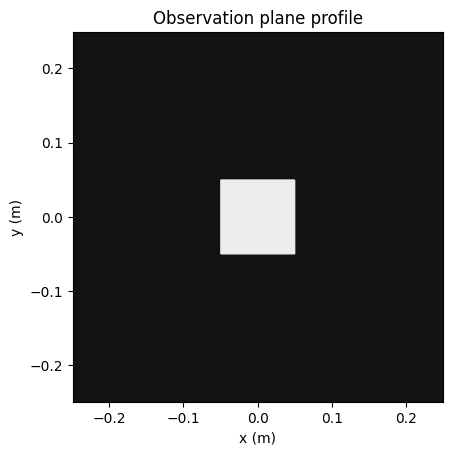

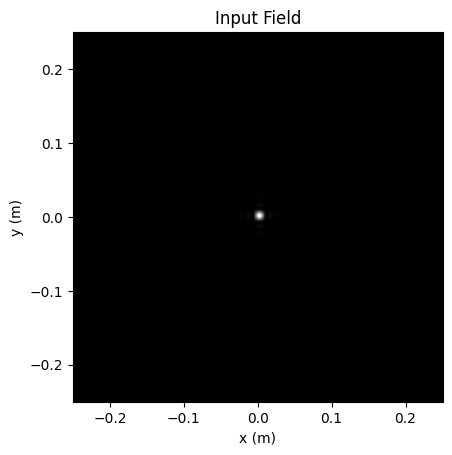

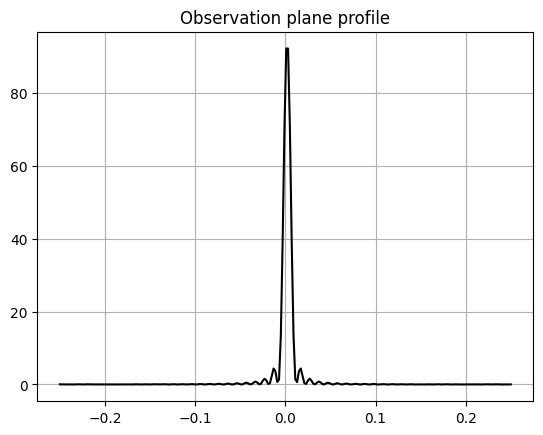

In [51]:
import numpy as np

def focus(uin, L, lambda_, zf):
    """
    Converging or diverging phase-front
    Assumes uniform sampling

    Parameters:
    uin : ndarray - Input field
    L : float - Side length
    lambda_ : float - Wavelength
    zf : float - Focal distance (positive for converging, negative for diverging)

    Returns:
    uout : ndarray - Output field with focus applied
    """
    M, N = uin.shape  # Get input field array size
    dx = L / M  # Sample interval
    k = 2 * np.pi / lambda_  # Wavenumber

    x = np.linspace(-L / 2, L / 2 - dx, M)  # Coordinates
    X, Y = np.meshgrid(x, x)  # Create 2D grid

    # Apply focus
    uout = uin * np.exp(-1j * k / (2 * zf) * (X**2 + Y**2))

    return uout

# Example usage (assuming `u1`, `L1`, `lambda`, and `zf` are defined elsewhere)
zf = 2000  # Focal distance in whatever units are consistent with lambda and L
u2 = focus(u1, L1, lamda, zf)  # Apply focus to u1

plt.contourf(np.abs(u2) ** 2, extent=(x1.min(), x1.max(), y1.min(), y1.max()), cmap='gray',origin='lower')
plt.title('Observation plane profile')
plt.axis('square')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


# Propagate field using Transfer Function
u3 = propTF(u2, L1, lamda, z)


plt.imshow(np.abs(u3) ** 2, extent=(x1.min(), x1.max(), y1.min(), y1.max()), cmap='gray',
                           origin='lower')
plt.axis('square')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Input Field')
plt.axis('square')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


# Top-right subplot: Plot of the central horizontal slice of I2
plt.plot(x1, (np.abs(u3) ** 2)[int(M/2) +1, :],"-k")
plt.grid(True)
plt.title('Observation plane profile')
plt.show()


## 6.4 Gratings and Periodic Functions

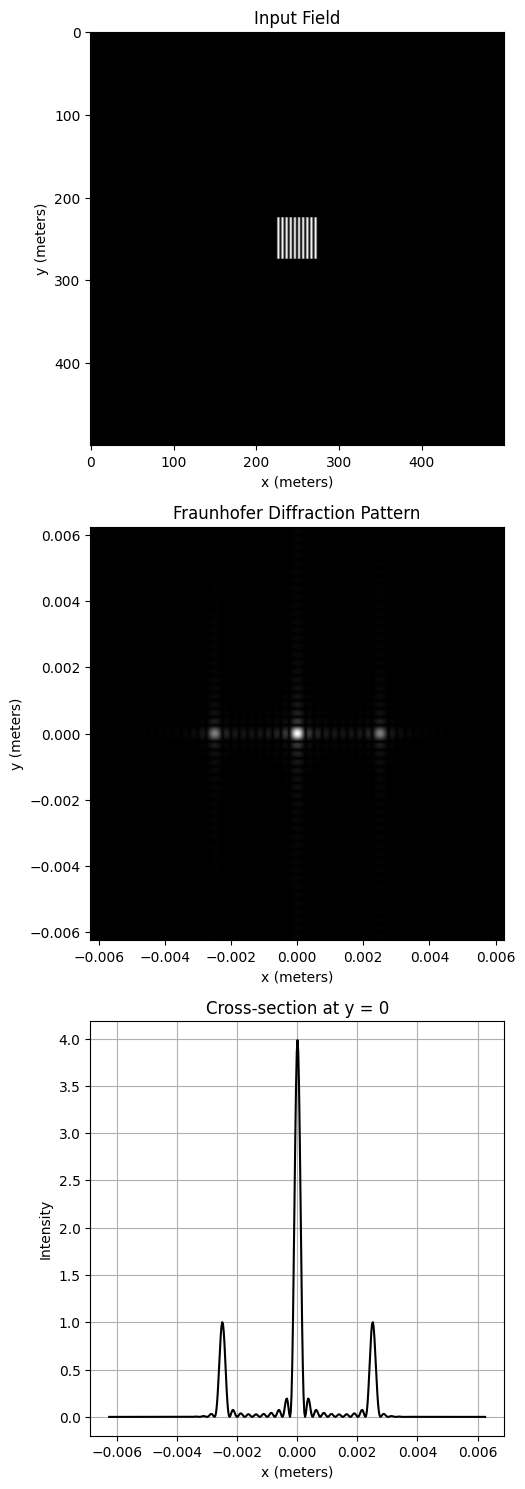

In [52]:
##########################################################

# 6.4.1 Cosine magnitude example

##########################################################

# Constants
lambda_ = 0.5e-6  # wavelength in meters
f = 0.5           # propagation distance in meters
P = 1e-4          # grating period in meters
D1 = 1.02e-3      # grating side length in meters
L1 = 1e-2       # array side length in meters
M = 500           # number of samples

# Setup
dx1 = L1 / M
x1 = np.linspace(-L1 / 2, L1 / 2, M)
X1, Y1 = np.meshgrid(x1, x1)

# Grating field and irradiance
u1 = 0.5 * (1 - np.cos(2 * np.pi * X1 / P)) * rect(X1 / D1) * rect(Y1 / D1)

# Fraunhofer pattern
u2, L2 = propFF(u1, L1, lambda_, f)
dx2 = L2 / M
x2 = np.linspace(-L2 / 2, L2 / 2, M)
y2 = x2
X2, Y2 = np.meshgrid(x2, y2)
I2 = np.abs(u2) ** 2


# Visualization
plt.figure(figsize=(5, 15))
plt.subplot(3, 1, 1)
plt.imshow(np.abs(u1), cmap='gray')
plt.title('Input Field')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')


plt.subplot(3, 1, 2)
plt.imshow(I2**0.5, extent=(x2[0], x2[-1], y2[0], y2[-1]), cmap='gray')
plt.title('Fraunhofer Diffraction Pattern')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')

plt.subplot(3, 1, 3)
plt.plot(x2, I2[int(M/2)], 'k-')
plt.title('Cross-section at y = 0')
plt.xlabel('x (meters)')
plt.ylabel('Intensity')
plt.grid(True)
plt.tight_layout()
plt.show()

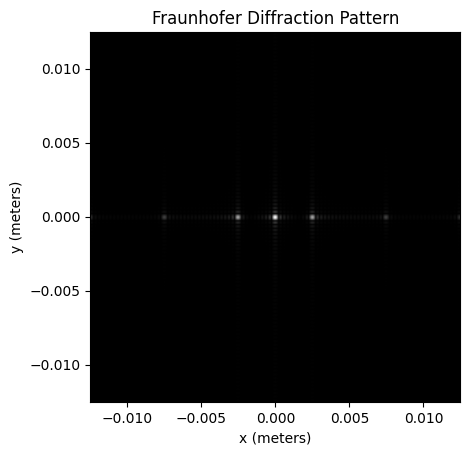

Text(0, 0.5, 'Intensity')

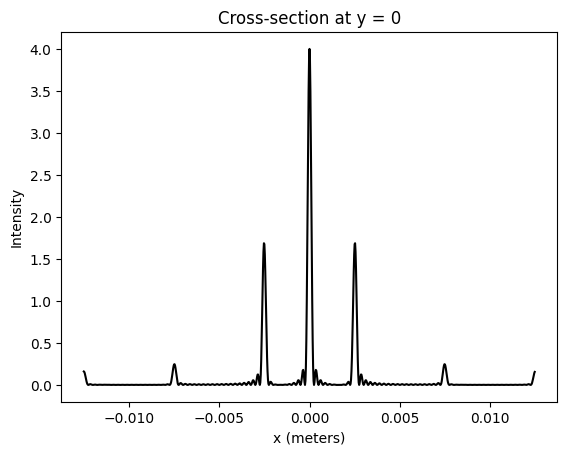

In [53]:
##########################################################

# 6.4.1 Square-wave magnitude example

##########################################################

# Constants and Setup
lambda_ = 0.5e-6  # wavelength in meters
f = 0.5           # propagation distance in meters
P = 1e-4          # grating period in meters
D1 = 1e-3         # grating side length in meters
L1 = 1e-2         # array side length in meters
M = 1000          # number of samples

dx1 = L1 / M
x1 = np.linspace(-L1 / 2, L1 / 2 - dx1, M)

# Constructing grating field
X1, Y1 = np.meshgrid(x1, x1)
fc = np.fft.fft(np.fft.fftshift(comb(x1 / P)))
fr = np.fft.fft(np.fft.fftshift(rect(x1 / (P / 2))))
ux = np.fft.ifftshift(np.fft.ifft(fc * fr))  # 1D convolution of rect and comb
u1 = np.tile(ux, (M, 1))  # replicate to 2D
u1 = u1 * rect(X1 / D1) * rect(Y1 / D1)  # set size

# Applying Fraunhofer diffraction (propFF function must be defined)
u2, L2 = propFF(u1, L1, lambda_, f)  # Use your existing propFF function here
dx2 = L2 / M
x2 = np.linspace(-L2 / 2, L2 / 2 - dx2, M)
y2 = x2
I2 = np.abs(u2) ** 2

# Visualization
plt.imshow(I2**0.5, extent=[x2.min(), x2.max(), y2.min(), y2.max()], cmap='gray')
plt.title('Fraunhofer Diffraction Pattern')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.show()

plt.plot(x2, I2[int(M/2)], 'k-')
plt.title('Cross-section at y = 0')
plt.xlabel('x (meters)')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity')

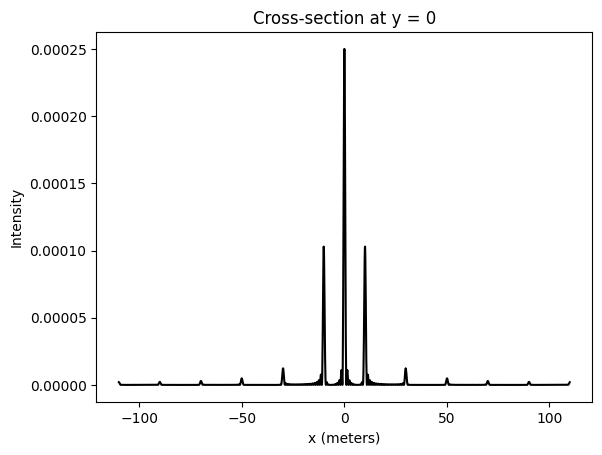

In [54]:
##########################################################

# 6.4.3 One-dimensional model

##########################################################
# Constants and Setup
lambda_ = 0.5e-6  # wavelength in meters
f = 0.5           # propagation distance in meters
P = 1e-4          # grating period in meters
D1 = 1e-3         # grating side length in meters
L1 = 1e-2         # array side length in meters
M = 2200          # number of samples

dx1 = L1 / M
x1 = np.linspace(-L1 / 2, L1 / 2 - dx1, M)

# Constructing grating field
X1, Y1 = np.meshgrid(x1, x1)
fc = np.fft.fft(np.fft.fftshift(comb(x1 / P)))
fr = np.fft.fft(np.fft.fftshift(rect(x1 / (P / 2))))
ux = np.fft.ifftshift(np.fft.ifft(fc * fr))  # 1D convolution of rect and comb
u1 = np.tile(ux, (M, 1))  # replicate to 2D
u1 = u1 * rect(X1 / D1) * rect(Y1 / D1)  # set size
lz = lamda*z
u2=np.sqrt(1/lz)*ifftshift(fft(fftshift(u1)))*dx1
L2=lz/dx1
x2 = np.linspace(-L2 / 2, L2 / 2 , M)

plt.plot(x2, u2[int(M/2)]**2, 'k-')
plt.title('Cross-section at y = 0')
plt.xlabel('x (meters)')
plt.ylabel('Intensity')

## 6.5 Exercises

* 6.1 The diagram in Fig. 6.17 illustrates the propagation of a field at an angle $α$
relative to the optical axis. The field support D2 just reaches to the edge of
observation plane side length, a distance L/2 from the axis. Use this
arrangement to derive the same tilt criterion as defined in Eq. (6.6). Assume
critical sampling and Fraunhofer propagation. For Fraunhofer propagation,
$D_2 = 2B_1\lambda z$.

* 6.2 Demonstrate both tilt and focus simultaneously for the sqr_beam example.
Use the TF approach with z = 2000 m. Assume $α$ = 5.0 * 10e-5 rad, $θ$ = 45 deg for tilt and $z_f$ = 4000 m for focus.

* 6.3 Among other applications, cylindrical lenses are commonly used to change
an oblong-shaped laser diode beam into a more circular beam.

  * (a) Create a function to produce a cylindrical focus (focus in only one
transverse axis).

  * (b) Demonstrate the cylindrical focus with the sqr_beam example, zf(X)
= 2000 m.

  * (c) Is it generally possible to describe the irradiance in the focal plane of a cylindrical lens in terms of a Fraunhofer pattern as was done in Eq. (6.18) or (6.19) for a spherical lens?

* 6.4 Airy pattern:
  * (a) Generate the Airy pattern shown in Fig. 6.7 for an ideal f/10 lens ( f = 250 mm and diameter 2wl = 25 mm). Use M = 250 and L = 250 mm.
Derive the analytic result and compare with the simulation result in a
profile plot.
  * (b) Demonstrate the effect in the focal plane of reducing the diameter of the lens pupil.

AND SO ON...

# Chapter 7 - Imaging and Diffraction Limited Imaging Simulation


## 7.2 Coherent Imaging

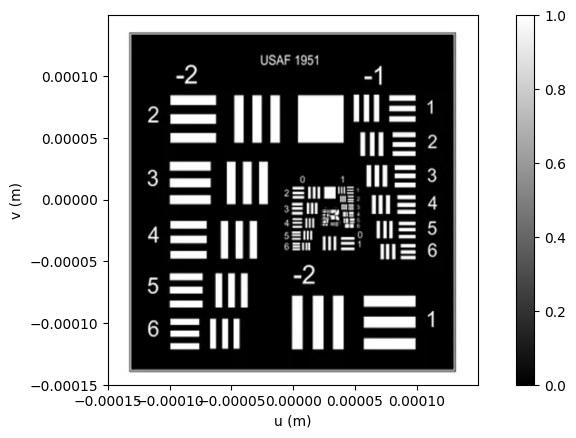

In [56]:
################################################################

#                 Coherent Imaging Example

################################################################

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 3: Read the image file
A = Image.open('USAF1951.png').convert('L').resize((500,500)) # Ensure the file path and name are correct

# Step 4: Get image size
M, N = A.size

# Step 5: Reverse row order
A = A.transpose(Image.FLIP_TOP_BOTTOM)

# Step 6: Convert integer to floating point
Ig = np.array(A, dtype=np.float32)

# Step 7: Normalize the image
Ig /= Ig.max()

# Step 9: Compute the ideal image field
ug = np.sqrt(Ig)

# Step 10: Define image plane side length
L = 0.3e-3  # meters

# Step 11: Compute the sample interval
du = L / M

# Step 12: Define coordinates
u = np.linspace(-L / 2, L / 2 - du, M)
v = u  # Assuming square image for simplicity

# Steps 14-18: Plotting the image
plt.figure()
plt.imshow(Ig, extent=(u.min(), u.max(), v.min(), v.max()), cmap='gray', origin='lower')
plt.colorbar()
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.axis('square')
plt.show()


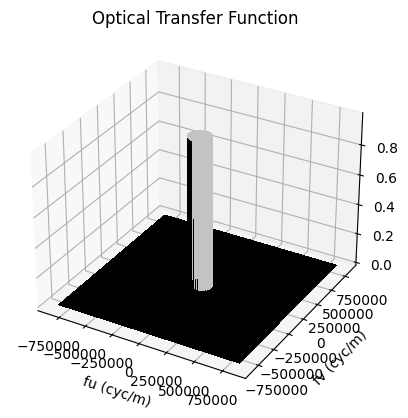

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

# Constants
lambda_ = 0.5e-6  # Wavelength in meters
wxp = 6.25e-3     # Exit pupil radius in meters
zxp = 125e-3      # Exit pupil distance in meters
f0 = wxp / (lambda_ * zxp)  # Cutoff frequency

# Step 10 from the previous example for du and L
L = 0.3e-3  # image plane side length from previous context
M = 500    # number of samples from previous context
du = L / M

# Frequency coordinates
fu = np.arange(-1/(2*du), 1/(2*du), 1/L)
fv = fu
Fu, Fv = np.meshgrid(fu, fv)

# Compute the transfer function H
radius = np.sqrt(Fu**2 + Fv**2) / f0
H = circ(radius)

# Visualizing the transfer function H
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ls = LightSource(azdeg=0, altdeg=65)  # Emulate MATLAB's camlight
rgb = ls.shade(H * 0.99, plt.cm.gray)  # Apply shading to grayscale
ax.plot_surface(Fu, Fv, H * 0.99, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False)
ax.set_xlabel('fu (cyc/m)')
ax.set_ylabel('fv (cyc/m)')
ax.set_title('Optical Transfer Function')
plt.show()


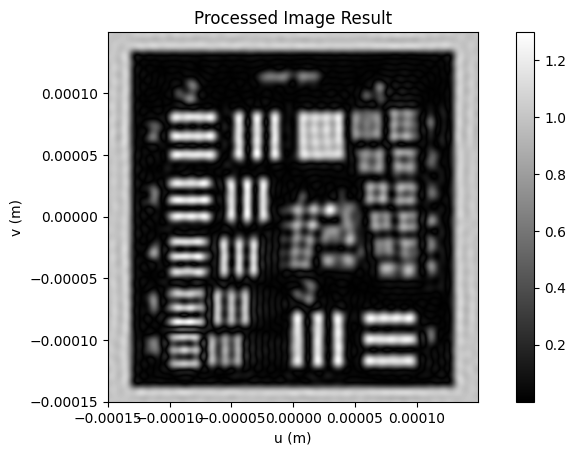

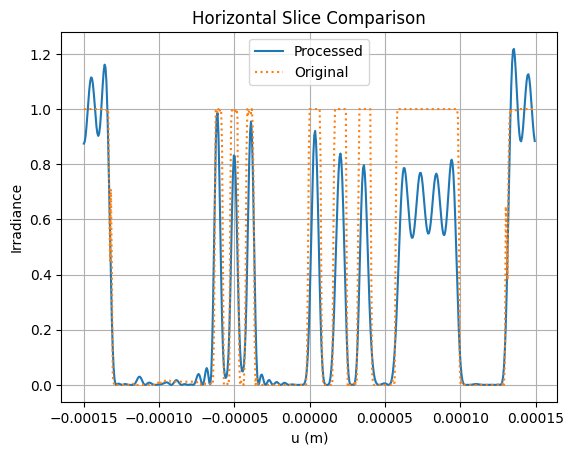

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Assumed previous variables and import statements are in place

# Apply the Optical Transfer Function
H = np.fft.fftshift(H)
Gg = np.fft.fft2(np.fft.fftshift(ug))
Gi = Gg * H
ui = np.fft.ifftshift(np.fft.ifft2(Gi))
Ii = np.abs(ui) ** 2

# Image result visualization
plt.figure()
plt.imshow(np.power(Ii, 0.5), extent=[u.min(), u.max(), v.min(), v.max()], cmap='gray', origin='lower')
plt.colorbar()
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.title('Processed Image Result')
plt.axis('square')
plt.show()

# Horizontal image slice
vvalue = -0.8e-4  # specific y value
vindex = int(round(vvalue / du + (M / 2 + 1)))  # convert y value to row index

plt.figure()
plt.plot(u, Ii[vindex, :], label='Processed')
plt.plot(u, Ig[vindex, :], ':', label='Original')
plt.xlabel('u (m)')
plt.ylabel('Irradiance')
plt.title('Horizontal Slice Comparison')
plt.legend()
plt.grid(True)
plt.show()


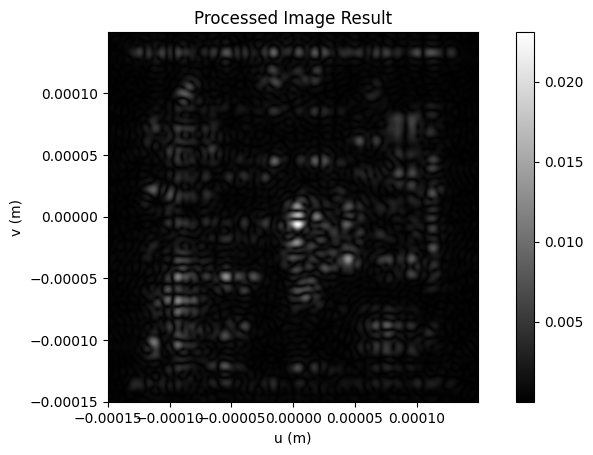

In [59]:
################################################################

#                 Coherent Imaging Example

################################################################

import numpy as np
import matplotlib.pyplot as plt

# Step 3: Read the image file
A = Image.open('USAF1951.png').convert('L').resize((500,500)) # Ensure the file path and name are correct

# Step 4: Get image size
M, N = A.size

# Step 5: Reverse row order
A = A.transpose(Image.FLIP_TOP_BOTTOM)

# Step 6: Convert integer to floating point
Ig = np.array(A, dtype=np.float32)

# Step 7: Normalize the image
Ig /= Ig.max()

# Assumed previous variables and import statements are in place

# Apply the Optical Transfer Function
ug = np.sqrt(Ig)*np.exp(1j*2*np.pi*np.random.rand(M)) #### we add this line (To create spackle pattern) ###
H = np.fft.fftshift(H)
Gg = np.fft.fft2(np.fft.fftshift(ug))
Gi = Gg * H
ui = np.fft.ifftshift(np.fft.ifft2(Gi))
Ii = np.abs(ui) ** 2

# Image result visualization
plt.figure()
plt.imshow(np.power(Ii, 0.5), extent=[u.min(), u.max(), v.min(), v.max()], cmap='gray', origin='lower')
plt.colorbar()
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.title('Processed Image Result')
plt.axis('square')
plt.show()

## 7.3 Incoherent Imaging


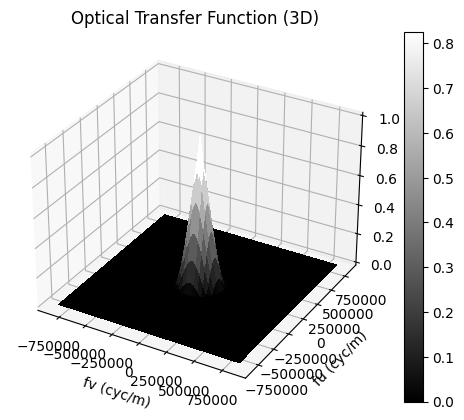

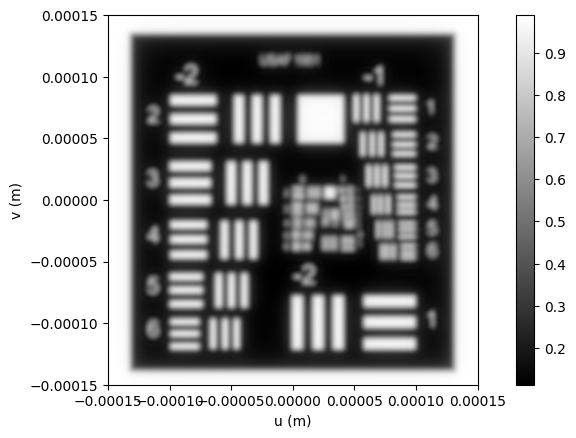

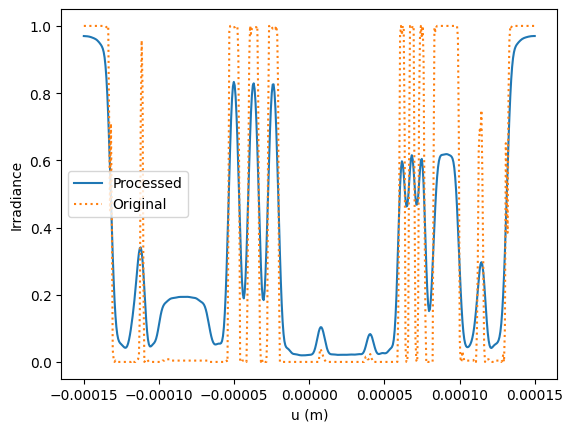

In [64]:
#################################################################

# Incoherent Imaging Example

#################################################################


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 3: Read the image file
A = Image.open('USAF1951.png').convert('L').resize((500,500))  # Ensure the file is in grayscale

# Step 4: Get image size and process the image
M, N = A.size
A = np.array(A)[::-1]  # Flip the image vertically
Ig = A.astype(np.float32)
Ig /= Ig.max()  # Normalize the image

# Define constants
L = 0.3e-3  # meters
du = L / M
u = np.linspace(-L / 2, L / 2, M)
v = u

# Optical system parameters
lambda_ = 0.5e-6  # Wavelength in meters
wxp = 6.25e-3     # Exit pupil radius in meters
zxp = 125e-3      # Exit pupil distance in meters
f0 = wxp / (lambda_ * zxp)  # Coherent cutoff frequency

# Frequency coordinates
fu = np.linspace(-M/(2*L), M/(2*L), M)#np.fft.fftfreq(M, du)
fv = fu
Fu, Fv = np.meshgrid(fu, fv)

# Optical transfer function (OTF)
radius = np.sqrt(Fu**2 + Fv**2) / f0
H = circ(f0)(Fu,Fv)
OTF = np.fft.ifft2(np.abs(np.fft.fft2(np.fft.fftshift(H)))**2)
OTF = np.abs(OTF / OTF[0, 0])

# Plotting the OTF using a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fu_sorted_indices = np.argsort(fu)
fv_sorted_indices = np.argsort(fv)
fu_sorted = fu[fu_sorted_indices]
fv_sorted = fv[fv_sorted_indices]
OTF_sorted = OTF[np.ix_(fu_sorted_indices, fv_sorted_indices)]

Fu, Fv = np.meshgrid(fu_sorted, fv_sorted)
surf = ax.plot_surface(Fu, Fv, np.fft.fftshift(OTF_sorted), cmap='gray', linewidth=0, antialiased=False)
fig.colorbar(surf)
ax.set_xlabel('fv (cyc/m)')
ax.set_ylabel('fu (cyc/m)')
ax.set_zlabel('OTF Magnitude')
plt.title('Optical Transfer Function (3D)')
plt.show()

# Convolution with OTF
Gg = np.fft.fft2(np.fft.fftshift(Ig))
Gi = Gg * OTF
Ii = np.fft.ifftshift(np.fft.ifft2(Gi))
Ii = np.real(Ii)  # Remove residual imaginary parts
Ii = np.maximum(Ii, 0)  # Remove values < 0

# Image result
plt.figure()
plt.imshow(np.sqrt(Ii), extent=(u.min(), u.max(), v.min(), v.max()), cmap='gray', origin='lower')
plt.colorbar()
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.axis('square')
plt.show()

# Horizontal image slice
vvalue = 0.2e-4
vindex = int(round(vvalue / du + (M / 2)))
plt.figure()
plt.plot(u, Ii[vindex, :], label='Processed')
plt.plot(u, Ig[vindex, :], ':', label='Original')
plt.xlabel('u (m)')
plt.ylabel('Irradiance')
plt.legend()
plt.show()


## 7.4 Exercises

# Chapter 8 - Wavefront Aberrations

## 8.2 Seidel Polynomials

Seidel polynomials are often used to describe monochromatic aberrations for
rotationally symmetric optical systems, such as most lenses and mirrors. A
common form that is applied in conventional imaging systems is described by

$$
W(\vec{u}_0, \rho, \theta) = \sum_{j, m, n} W_{k l m} \vec{u}_0^k \rho^l \cos^m \theta, \quad k = 2j + m, \quad l = 2n + m
$$


where $ρ$ is a normalized radial distance in the XP and $θ$ is the angle in the XP as  shown in Fig. 8.2(a). For computational reasons the angle $\theta$ is defined here relative to the x axis in a counter-clockwise direction. $u_0$ is fractional image height or normalized image height.

$$
\rho = \sqrt{x^2 + y^2} \quad \text{and} \quad \rho \cos \theta = x,$$

and the primary aberrations are then written

$$W(\vec{u}_0; x, y) = W_d \left( x^2 + y^2 \right) + W_{040} \left( x^2 + y^2 \right)^2 + W_{131} \vec{u}_0 \left( x^2 + y^2 \right) x + W_{222} \vec{u}_0^2 x^2 + W_{220} \vec{u}_0^2 \left( x^2 + y^2 \right) + W_{311} \vec{u}_0^3 x.$$


Wd: Defocus

W404: Spherical

W131: Coma

W222: Astigmatism

W220: Field Curvature

W311:  Distortion


[[4.035      3.91692309 3.80273007 ... 3.80952636 3.92770127 4.05      ]
 [3.91692309 3.80040587 3.68774072 ... 3.69457616 3.81122404 3.93196391]
 [3.80273007 3.68774072 3.57657227 ... 3.5835252  3.69867885 3.81789332]
 ...
 [3.80952636 3.69457616 3.5835252  ... 3.9588079  4.08159836 4.20852799]
 [3.92770127 3.81122404 3.69867885 ... 4.08159836 4.20604384 4.33466128]
 [4.05       3.93196391 3.81789332 ... 4.20852799 4.33466128 4.465     ]]


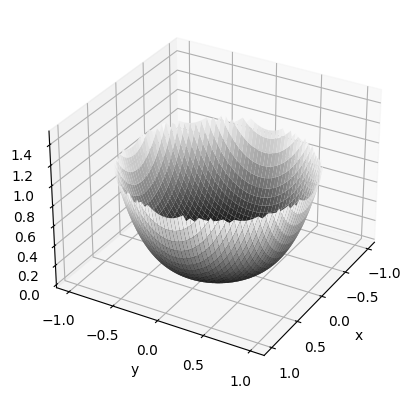

In [65]:
#################################################################

# 8.2.1 Seidel Polynomials - Definition and primary aberrations

#################################################################

def seidel_5(u0, v0, X, Y, wd, w040, w131, w222, w220, w311):
    """
    Compute wavefront OPD for the first 5 Seidel wavefront aberration coefficients + defocus.

    Parameters:
    u0, v0 : float
        Normalized image plane coordinates.
    X, Y : array_like
        Normalized pupil coordinate arrays (from meshgrid).
    wd : float
        Defocus coefficient.
    w040 : float
        Spherical aberration coefficient.
    w131 : float
        Coma aberration coefficient.
    w222 : float
        Astigmatism coefficient.
    w220 : float
        Field curvature coefficient.
    w311 : float
        Distortion coefficient.

    Returns:
    w : array_like
        Wavefront OPD (Optical Path Difference).
    """

    # Image rotation angle
    beta = np.arctan2(v0, u0)

    # Image height
    u0r = np.sqrt(u0 ** 2 + v0 ** 2)

    # Rotate grid
    Xr = X * np.cos(beta) + Y * np.sin(beta)
    Yr = -X * np.sin(beta) + Y * np.cos(beta)

    # Seidel polynomials
    rho2 = Xr ** 2 + Yr ** 2
    w = (wd * rho2 +
         w040 * rho2 ** 2 +
         w131 * u0r * rho2 * Xr +
         w222 * u0r ** 2 * Xr ** 2 +
         w220 * u0r ** 2 * rho2 +
         w311 * u0r ** 3 * Xr)

    return w

import numpy as np

# Example input
u0, v0 = 0.5, 0.5
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
wd, w040, w131, w222, w220, w311 = 1, 0.5, 0.1, 0.2, 0.05, 0.03

# Call the function
w = seidel_5(u0, v0, X, Y, wd, w040, w131, w222, w220, w311)

print(w)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the seidel_5 function
def seidel_5(u0, v0, X, Y, wd, w040, w131, w222, w220, w311):
    beta = np.arctan2(v0, u0)
    u0r = np.sqrt(u0**2 + v0**2)
    Xr = X * np.cos(beta) + Y * np.sin(beta)
    Yr = -X * np.sin(beta) + Y * np.cos(beta)
    rho2 = Xr**2 + Yr**2
    w = (wd * rho2 +
         w040 * rho2**2 +
         w131 * u0r * rho2 * Xr +
         w222 * u0r**2 * Xr**2 +
         w220 * u0r**2 * rho2 +
         w311 * u0r**3 * Xr)
    return w



# Define the variables
u0, v0 = 1, 0
wd, w040, w131, w222, w220, w311 = 0, 1, 0, 0, 0, 0

# Create a meshgrid for X and Y
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate the wavefront OPD
w = seidel_5(u0, v0, X, Y, wd, w040, w131, w222, w220, w311)

# Create the circular pupil function
P = circ_(X,Y,1)

# Mask where P == 0
mask = (P == 0)
w[mask] = np.nan

# Plot the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, w, cmap='gray', edgecolor='none')

# Add lighting effect
ax.view_init(30, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlim([0,1.5])

plt.show()


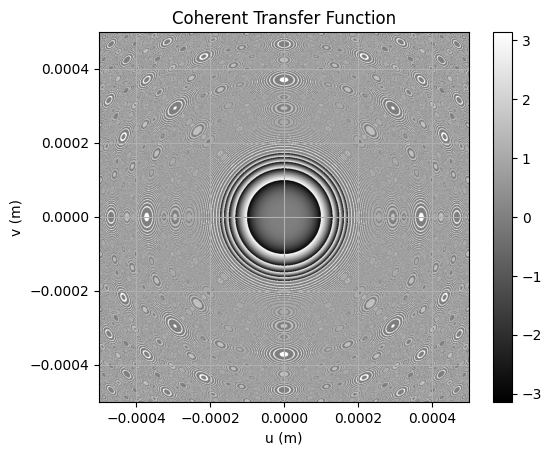

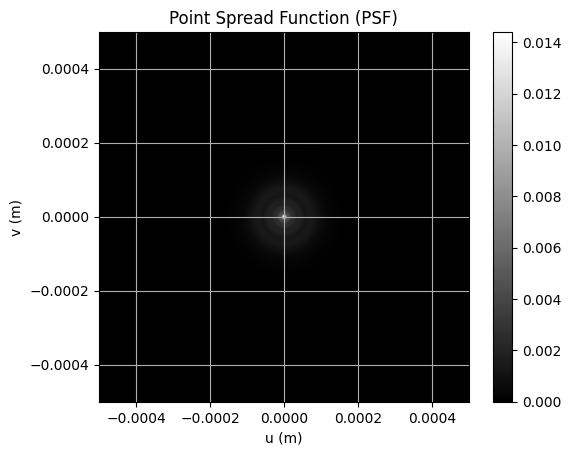

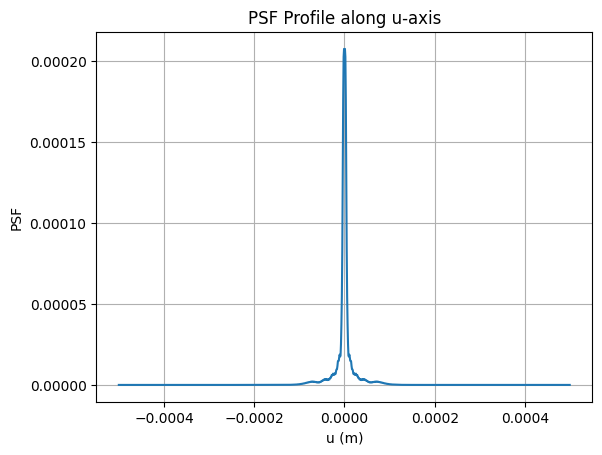

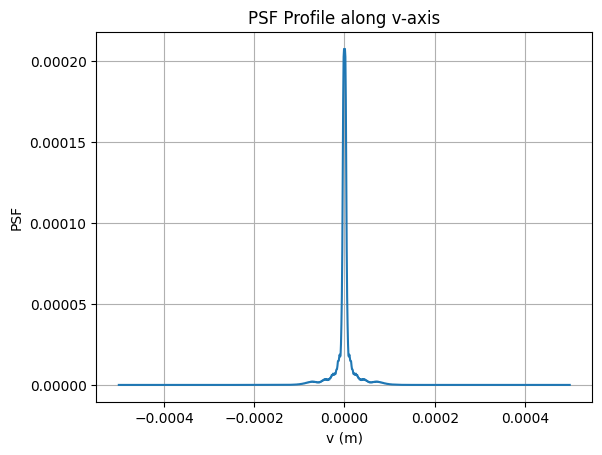

<ipython-input-66-51971558433e>:116: RuntimeWarning: invalid value encountered in arccos
  MTF_an = (2 / np.pi) * (np.arccos(fu / twof0) - (fu / twof0) * np.sqrt(1 - (fu / twof0)**2))
<ipython-input-66-51971558433e>:116: RuntimeWarning: invalid value encountered in sqrt
  MTF_an = (2 / np.pi) * (np.arccos(fu / twof0) - (fu / twof0) * np.sqrt(1 - (fu / twof0)**2))


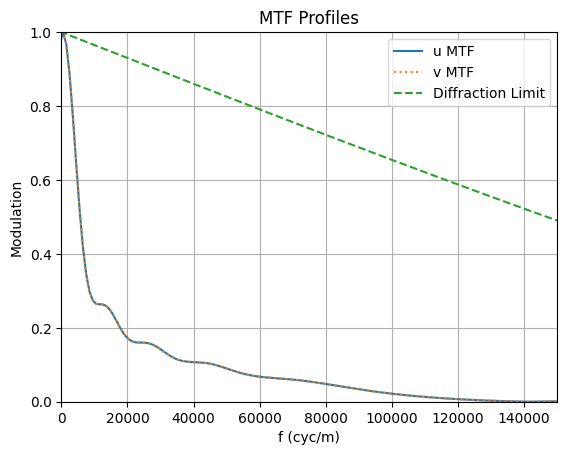

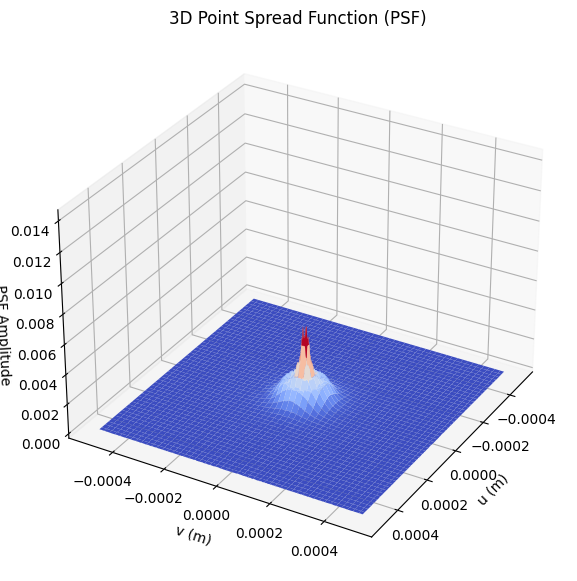

In [66]:
#################################################################

# 8.5 Lens Example—PSF and MTF

#################################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Define the seidel_5 function from before
def seidel_5(u0, v0, X, Y, wd, w040, w131, w222, w220, w311):
    beta = np.arctan2(v0, u0)
    u0r = np.sqrt(u0**2 + v0**2)
    Xr = X * np.cos(beta) + Y * np.sin(beta)
    Yr = -X * np.sin(beta) + Y * np.cos(beta)
    rho2 = Xr**2 + Yr**2
    w = (wd * rho2 +
         w040 * rho2**2 +
         w131 * u0r * rho2 * Xr +
         w222 * u0r**2 * Xr**2 +
         w220 * u0r**2 * rho2 +
         w311 * u0r**3 * Xr)
    return w

# Function for circular pupil

# Constants
M = 1024
L = 1e-3
du = L / M
u = np.arange(-L/2, L/2, du)
v = u
lambda_ = 0.55e-6  # Wavelength
k = 2 * np.pi / lambda_  # Wavenumber
Dxp = 20e-3  # Exit pupil size
wxp = Dxp / 2  # Half the exit pupil size
zxp = 100e-3  # Exit pupil distance
fnum = zxp / (2 * wxp)  # Exit pupil f-number
lz = lambda_ * zxp
twof0 = 1 / (lambda_ * fnum)  # Incoherent cutoff frequency

u0 = 0  # Normalized image coordinate
v0 = 0

# Aberration coefficients
wd = 0 * lambda_
w040 = 4.963 * lambda_
w131 = 2.637 * lambda_
w222 = 9.025 * lambda_
w220 = 7.536 * lambda_
w311 = 0.157 * lambda_

# Image frequency coordinates
fu = np.linspace(-1/(2*du), 1/(2*du), int(L/du))
Fu, Fv = np.meshgrid(fu, fu)

# Wavefront
W = seidel_5(u0, v0, -lz * Fu / wxp, -lz * Fv / wxp, wd, w040, w131, w222, w220, w311)

# Coherent transfer function
H = circ_(Fu, Fv,  wxp/lz) * np.exp(-1j * k * W)

# Plot the coherent transfer function
plt.figure(1)
plt.imshow(np.angle(H), extent=[u[0], u[-1], v[0], v[-1]], cmap='gray', origin='lower')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.axis('square')
plt.colorbar()
plt.title('Coherent Transfer Function')
plt.grid(True)

plt.show()

# Point Spread Function
h2 = np.abs(ifftshift(ifft2(fftshift(H))))**2

# Plot PSF image
plt.figure(2)
plt.imshow(np.sqrt(h2), extent=[u[0], u[-1], v[0], v[-1]], cmap='gray', origin='lower')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.axis('square')
plt.colorbar()
plt.title('Point Spread Function (PSF)')
plt.grid(True)

plt.show()

# Plot PSF profiles
plt.figure(3)
plt.plot(u, h2[M//2, :])
plt.xlabel('u (m)')
plt.ylabel('PSF')
plt.title('PSF Profile along u-axis')
plt.grid(True)

plt.show()

plt.figure(4)
plt.plot(u, h2[:, M//2])
plt.xlabel('v (m)')
plt.ylabel('PSF')
plt.title('PSF Profile along v-axis')
plt.grid(True)

plt.show()

# MTF (Modulation Transfer Function)
MTF = np.abs(fft2(fftshift(h2)))
MTF = MTF / MTF[0, 0]  # Normalize DC component to 1
MTF = ifftshift(MTF)

# Analytic MTF
MTF_an = (2 / np.pi) * (np.arccos(fu / twof0) - (fu / twof0) * np.sqrt(1 - (fu / twof0)**2))
MTF_an = MTF_an * (np.abs(fu) <= twof0)  # Zero after cutoff

# Plot MTF profiles
plt.figure(5)
plt.plot(fu, MTF[M//2, :], label='u MTF')
plt.plot(fu, MTF[:, M//2], ':', label='v MTF')
plt.plot(fu, MTF_an, '--', label='Diffraction Limit')
plt.axis([0, 150000, 0, 1])
plt.legend()
plt.xlabel('f (cyc/m)')
plt.ylabel('Modulation')
plt.title('MTF Profiles')
plt.grid(True)
plt.show()


# Add 3D plotting import
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D PSF plot
fig = plt.figure(figsize=(10, 7))

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for u and v
U, V = np.meshgrid(u, v)

# Plot the 3D surface for the PSF
ax.plot_surface(U, V, np.sqrt(h2), cmap= "coolwarm", edgecolor='none')

# Add labels and title
ax.set_title('3D Point Spread Function (PSF)')
ax.set_xlabel('u (m)')
ax.set_ylabel('v (m)')
ax.set_zlabel('PSF Amplitude')

# Adjust the view angle for better visualization
ax.view_init(30, 30)


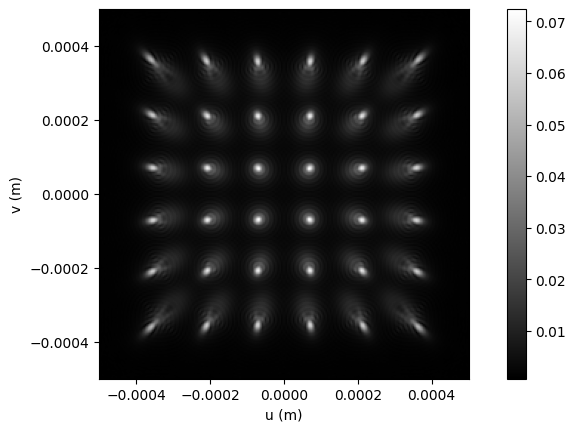

In [67]:
#################################################################

# 8.7 Superposition Imaging Example

#################################################################

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fft2, fftshift, ifft, ifft2, ifftshift
from scipy.ndimage import shift


def seidel_5(u0, v0, X, Y, wd, w040, w131, w222, w220, w311):
    beta = np.arctan2(v0, u0)
    u0r = np.sqrt(u0**2 + v0**2)
    Xr = X * np.cos(beta) + Y * np.sin(beta)
    Yr = -X * np.sin(beta) + Y * np.cos(beta)
    rho2 = Xr**2 + Yr**2
    w = (wd * rho2 +
         w040 * rho2**2 +
         w131 * u0r * rho2 * Xr +
         w222 * u0r**2 * Xr**2 +
         w220 * u0r**2 * rho2 +
         w311 * u0r**3 * Xr)
    return w

pi = np.pi
j = 1j
M= 250
L = 1e-3
du = L/M
u = np.linspace(-L/2, L/2, M)
v = u

lambda_ = 0.5e-6
k = 2*pi/lambda_
wxp = 2.5e-3
zxp = 100e-3
fnum = zxp / (2*wxp)

twof0 = 1/ (lambda_ * fnum)
fN = M/ (2* L)

wd = 0 * lambda_
w040 = 0.5 * lambda_
w131 = 1 * lambda_
w222 = 1.5 * lambda_
w220 = 0 * lambda_
w311 = 0 * lambda_

fu = np.linspace(-M/(2*L),M/(2*L), M)
fu = fftshift(fu)
Fu, Fv = np.meshgrid(fu, fu)

I = np.zeros((M,M))

# Loop through image plane positions
for u0 in np.linspace(-0.7, 0.7, 6):
    for v0 in np.linspace(-0.7, 0.7, 6):
        # Wavefront aberration calculation
        W = seidel_5(u0, v0, -2 * lambda_ * fnum * Fu, -2 * lambda_ * fnum * Fv, wd, w040, w131, w222, w220, w311)

        # Coherent transfer function
        H = circ_(Fu, Fv,  (2 * lambda_ * fnum)**-1) * np.exp(-1j * k * W)

        # Point Spread Function (PSF)
        h2 = np.abs(ifftshift(ifft2(H))) ** 2

        # Shift PSF to image plane position
        h2 = shift(h2, [round(v0 * M / 2), round(u0 * M / 2)], mode='wrap')

        # Add into the combined frame
        I += h2

# Display the image using nth root scaling and plot settings
plt.figure(1)
plt.imshow(np.power(I, 1/2), extent=[u.min(), u.max(), v.min(), v.max()], cmap='gray', aspect='equal', origin='lower')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.colorbar()  # Optional: to add a color bar
plt.axis('square')
plt.show()


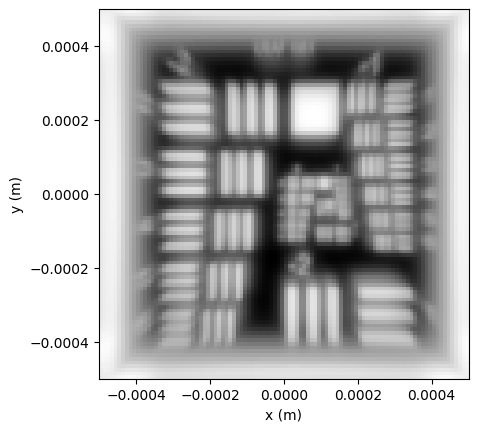

'\nSome comments on image_super:\n(a) Line 31: To avoid the time required to “flip” the PSF within the for\nloops, the frequency coordinate vector fu is reversed.\n\n(b) Line 32: fu is shifted to avoid using fftshift on H in line 49 (a time\nsaver).\n\n(c) Line 36: for loops are used to step through each position in the\nimage plane corresponding to all coordinate pairs u0ˆ , v0ˆ .\n\n(d) Lines 37 and 38: The first loop involves the row index n. Because of\nMATLAB’s row/column ordering, this index corresponds to the yaxis variable v0.\nThis is one of the few times in this book where it is\nnecessary to use the index values to derive physical parameter\nvalues. Looping with the index is forced by line 53, where each\nirradiance matrix element is addressed.\n\n(e) Lines 39 and 40: The second loop involves the row index m\ncorresponding to the x-axis variable u0.\n\n(f) Line 51: circshift is applied using the index variables, which has\nthe same effect as the approach used with circshift 

In [68]:
#################################################################

# 8.7.2 Image Simulation

#################################################################


import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image
import scipy as sc



def seidel_5(u0, v0, X, Y, wd, w040, w131, w222, w220, w311):
    beta = np.arctan2(v0, u0)
    u0r = np.sqrt(u0**2 + v0**2)
    Xr = X * np.cos(beta) + Y * np.sin(beta)
    Yr = -X * np.sin(beta) + Y * np.cos(beta)
    rho2 = Xr**2 + Yr**2
    w = (wd * rho2 +
         w040 * rho2**2 +
         w131 * u0r * rho2 * Xr +
         w222 * u0r**2 * Xr**2 +
         w220 * u0r**2 * rho2 +
         w311 * u0r**3 * Xr)
    return w


# Load the image file (make sure the file path is correct)
# Load the image
pi = np.pi
j = 1j

A = Image.open('USAF1951.png',).convert('L').resize((100,100))
M, N = np.shape(A); A = np.flipud(A)
Ig = np.single(A); Ig = Ig/np.max(np.max(Ig))

L = 1e-3
du = L/M
u = np.linspace(-L/2, L/2, M); v = u
fN = M / (2*L)

lambda_ = 0.5e-6
k = 2*pi/lambda_
wxp = 2.5e-3
zxp = 100e-3
fnum = zxp/(2*wxp)

twof0 = 1/(lambda_* fnum)
fN = M/(2*L)


wd = 0 * lambda_
w040 = 0.5 * lambda_
w131 = 1 * lambda_
w222 = 1.5 * lambda_
w220 = 0 * lambda_
w311 = 0 * lambda_



fu = np.linspace(M/(2*L), -M/(2*L), M)
fu = fftshift(fu)
Fu, Fv = np.meshgrid(fu,fu)

I = np.zeros((M,M))
# Loop through image plane positions
for n in range(M):
    v0 = (n - (M / 2 + 1)) / (M / 2)  # Normalized v image coord
    for m in range(M):
        u0 = (m - (M / 2 + 1)) / (M / 2)  # Normalized u image coord

        # Wavefront calculation using Seidel aberrations
        W = seidel_5(u0, v0, -2 * lambda_ * fnum * Fu, -2 * lambda_ * fnum * Fv, wd, w040, w131, w222, w220, w311)

        # Coherent transfer function
        H = circ_(Fu, Fv, (2 * lambda_ * fnum)**-1) * np.exp(-1j * k * W)

        # Point Spread Function (PSF)
        h2 = np.abs(ifftshift(ifft2(H)))**2

        # Shift PSF to the image plane position
        h2 = np.roll(np.roll(h2, n - int(M / 2 + 1), axis=0), m - int(M / 2 + 1), axis=1)

        # Superposition integration
        I[n, m] = np.sum(Ig * h2)

# Now `I` contains the final image plane intensity.

# Plot the image
plt.figure(1)
plt.imshow(np.cbrt(I), extent=(u.min(), u.max(), v.min(), v.max()), cmap='gray', aspect='equal', origin='lower')

# Set axis labels
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Show the plot with a square axis
plt.axis('square')

# Show the plot
plt.show()

'''
Some comments on image_super:
(a) Line 31: To avoid the time required to “flip” the PSF within the for
loops, the frequency coordinate vector fu is reversed.

(b) Line 32: fu is shifted to avoid using fftshift on H in line 49 (a time
saver).

(c) Line 36: for loops are used to step through each position in the
image plane corresponding to all coordinate pairs u0ˆ , v0ˆ .

(d) Lines 37 and 38: The first loop involves the row index n. Because of
MATLAB’s row/column ordering, this index corresponds to the yaxis variable v0.
This is one of the few times in this book where it is
necessary to use the index values to derive physical parameter
values. Looping with the index is forced by line 53, where each
irradiance matrix element is addressed.

(e) Lines 39 and 40: The second loop involves the row index m
corresponding to the x-axis variable u0.

(f) Line 51: circshift is applied using the index variables, which has
the same effect as the approach used with circshift in psf_map.

(g) Line 53: Finally, the superposition integral [Eq. (8.17)] is performed.

(h) A final comment: This code takes a relatively long time to execute!
(About an hour on my laptop.) Individual PSFs (250  250 = 62,500)
are created and incorporated in the superposition frame. Compare
this with a convolution result that involves a single PSF and can be
accomplished in fractions of a second with a few fast Fourier
tranforms. The luxury of a convolution is not available in this case.

'''



# Chapter 9 - Partial Coherence Simulation

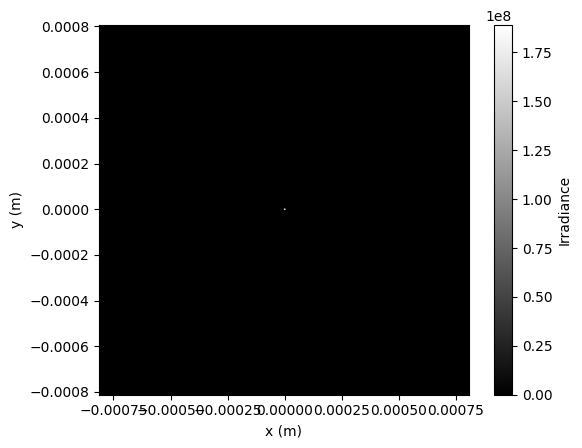

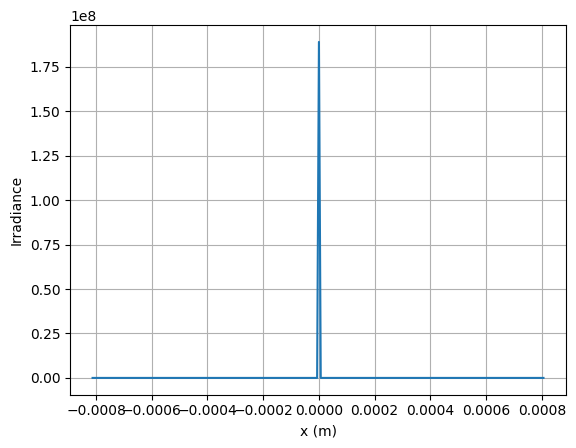

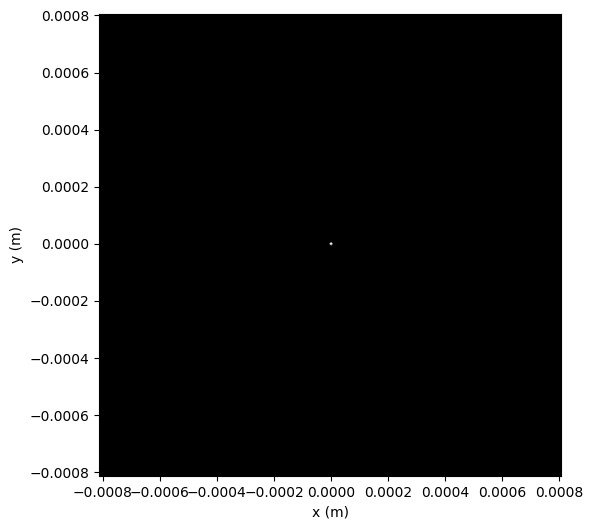

In [69]:
#################################################################

# 9.1.3 Partial temporal coherence example n

#################################################################

# pc_temp partial temporal coherence example
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift


'''
from FourierOptics.psf_map_8 import lambda_
def circ(x,y,r):
    return np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

pi = np.pi; j= 1j
lambda0 = 650e-9
c = 3e8
k0 = 2*pi/ lambda0
nu0 = c/lambda0


N = 51
delnu = 2e9
b = delnu/ (2* np.sqrt(np.log(2)))
dnu = 4 * delnu/N


L1 = 50e-3
M = 250
dx1 = L1/M
x1 = np.linspace(-L1/2,L1/2, M)
x1 = fftshift(x1)
X1, Y1 = np.meshgrid(x1,x1)


w = 1e-3
dels = 5e-3
deld = 5e-2
f = 0.25
lf = lambda0* f

II = np.zeros((M,M))

for n in range(N):
    # Spectral density function
    nu = (n - (N + 1) / 2) * dnu + nu0
    S = 1 / (np.sqrt(pi) * b) * np.exp(-((nu - nu0) ** 2) / b ** 2)
    k = 2 * pi * nu / c

    u = circ(X1- dels/2, Y1, w)+ (circ(X1+ dels/2, Y1, w) * np.exp(j*k*deld))
    #circ1 = np.where(u1 <= 1, 1, 0)  # Circular aperture function
    #circ2 = np.where(u2 <= 1, 1, 0)  # Circular aperture function
    #u = circ1 + circ2 * np.exp(1j * k * deld)

    # Fraunhofer pattern (Fourier transform of the source)
    u2 = 1 / lf * fft2(u) * dx1 ** 2

    # Weighted irradiance and summation
    II += S * (np.abs(u2) ** 2) * dnu

I3 = ifftshift(II)
x2 = np.linspace(-M/(2*L1), M/(2*L1), M)
y2 = x2


# Figure 1: Irradiance image
plt.figure(1)
plt.imshow(I3, extent=(x2.min(), x2.max(), y2.min(), y2.max()), cmap='gray', origin='lower')

# Set axis labels and properties
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('square')  # Make the axes square
plt.colorbar(label='Irradiance')  # Add a colorbar for reference
plt.show()

# Figure 2: Irradiance profile across the center
plt.figure(2)
plt.plot(x2, I3[int(M / 2), :],'b.-')  # Profile at the middle row

# Set axis labels
plt.xlabel('x (m)')
plt.ylabel('Irradiance')
plt.grid(True)  # Optionally, add a grid for better readability
plt.show()
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifftshift

# Constants
lambda0 = 650e-9  # center wavelength (m)
c = 3e8  # speed of light (m/s)
k0 = 2 * np.pi / lambda0  # center wavenumber
nu0 = c / lambda0  # center frequency (Hz)

# Gaussian lineshape parameters
N = 51  # number of components (odd)
delnu = 2e9  # spectral density FWHM (Hz)
b = delnu / (2 * np.sqrt(np.log(2)))  # FWHM scaling
dnu = 4 * delnu / N  # frequency interval

# Source plane parameters
L1 = 50e-3  # source plane side length (m)
M = 250  # number of samples (even)
dx1 = L1 / M  # sample interval
x1 = np.linspace(-L1/2, L1/2 - dx1, M)  # source coordinates
x1 = np.fft.fftshift(x1)  # shift x coord
X1, Y1 = np.meshgrid(x1, x1)  # create grid

# Beam parameters
w = 1e-3  # radius of the beam
dels = 5e-3  # transverse separation (m)
deld = 5e-2  # delay distance (m)
f = 0.5  # focal distance for Fraunhofer diffraction
lf = lambda0 * f  # product for Fraunhofer pattern

# Initialize the irradiance array
I2 = np.zeros((M, M))


# Observation coordinates
x2 = np.linspace(-1/(2*dx1), 1/(2*dx1) - 1/L1, M) * lf
y2 = x2


# Loop through frequency components
for n in range(N):
    # Spectral density function
    nu = (n - (N + 1) / 2) * dnu + nu0
    S = 1 / (np.sqrt(np.pi) * b) * np.exp(-((nu - nu0) ** 2) / b ** 2)
    k = 2 * np.pi * nu / c

    # Source function
    u1 = circ(np.sqrt((X1 - dels / 2) ** 2 + Y1 ** 2) / w)(X1,Y1)
    u2 = circ(np.sqrt((X1 + dels / 2) ** 2 + Y1 ** 2) / w)(X1, Y1) * np.exp(1j * k * deld)
    u = u1 + u2

    # Fraunhofer pattern
    u2 = (1 / lf) * fft2(u) * dx1 ** 2

    # Weighted irradiance and summation
    I2 += S * (np.abs(u2) ** 2) * dnu
# Observation coordinates
x2 = np.linspace(-1/(2*dx1), 1/(2*dx1) - 1/L1, M) * lf
y2 = x2

# Normalize and center the irradiance pattern
I2 = ifftshift(I2)

# Plot irradiance image
plt.figure(1)
plt.imshow(I2, extent=(x2.min(), x2.max(), y2.min(), y2.max()), cmap='gray', aspect='equal', origin='lower')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('square')
plt.colorbar(label='Irradiance')
plt.show()

# Plot irradiance profile
plt.figure(2)
plt.plot(x2, I2[M//2, :])  # Profile at the center row
plt.xlabel('x (m)')
plt.ylabel('Irradiance')
plt.grid(True)
plt.show()

# Plot irradiance image (like the left part of the image you uploaded)
plt.figure(figsize=(6,6))
plt.contourf(x2, y2, I2, levels=200, cmap='gray')  # Using contour plot for a similar look
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('square')
plt.show()




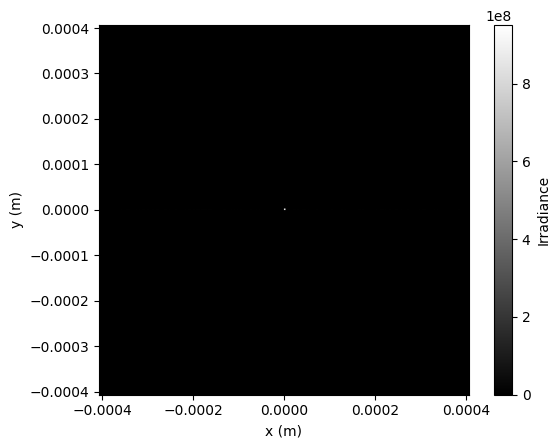

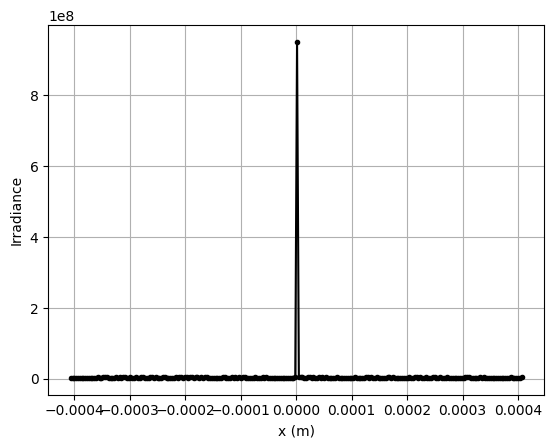

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifftshift, ifft2, fftshift

# Constants
lambda0 = 650e-9  # center wavelength (m)

# Source plane parameters
L1 = 50e-3  # source plane side length (m)
M = 250  # number of samples (even)
dx1 = L1 / M  # sample interval
x1 = np.linspace(-L1/2, L1/2 - dx1, M)  # source coordinates
x1 = np.fft.fftshift(x1)  # shift x coord
X1, Y1 = np.meshgrid(x1, x1)  # create grid

# Beam parameters
w = 1e-3  # radius of the beam
dels = 5e-3  # transverse separation (m)
deld = 5e-2  # delay distance (m)
f = 0.25  # focal distance for Fraunhofer diffraction
lf = lambda0 * f  # product for Fraunhofer pattern

N= 100
Lcr = 8e-2
sigma_f = 2.5*Lcr
sigma_r = np.sqrt((4*np.pi* sigma_f**4)/ (Lcr**2))

dfx1 = 1/L1
fx1 = np.linspace(-M/(2*L1), M/(2*L1), M)
fx1 = fftshift(fx1)
FX1, FY1 = np.meshgrid(fx1, fx1)



u1 = (circ(np.sqrt((X1 - dels / 2) ** 2 + Y1 ** 2) / w)(X1,Y1) +
      circ(np.sqrt((X1 + dels / 2) ** 2 + Y1 ** 2) / w)(X1, Y1))

F = np.exp(-np.pi**2 * sigma_f**2 * (FX1**2 + FY1**2))

I2 = np.zeros((M,M))

for n in range(N):
    fie = (ifft2(F* np.random.randn(M)) + 1j* np.random.randn(M) * sigma_r/dfx1) * M**2 * dfx1**2

    u2 = 1/lf * (fft2(u1* np.exp(1j* np.real(fie)))) * dx1**2

    I2 += np.abs(u2)**2

    u2 = 1/lf * (fft2(u1* np.exp(1j*np.imag(fie))))*dx1**2
    I2 += np.abs(u2)**2


I2 = ifftshift(I2) /N
x2 = np.linspace(-M/(2*L1),M/(2*L1), M)* lf
y2 = x2

# Plot irradiance image
plt.figure(1)
plt.imshow(I2, extent=(x2.min(), x2.max(), y2.min(), y2.max()), cmap='gray', aspect='equal', origin='lower')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('square')
plt.colorbar(label='Irradiance')
plt.show()

# Plot irradiance profile
plt.figure(2)
plt.plot(x2, I2[M//2, :],"k.-")  # Profile at the center row
plt.xlabel('x (m)')
plt.ylabel('Irradiance')
plt.grid(True)
plt.show()

